# Прогнозирование оттока клиентов в сети отелей "Как в гостях"

## Описание проекта

Заказчиком данного исследования является сеть отелей "Как в гостях". Основной проблемой, перед которой стоит компания, является отмена бронирования номеров клиентами. Эта проблема ведет к финансовым убыткам, так как в случае отмены брони отель может не успеть найти другого клиента или уже закупить продукты к приезду гостя.

Для решения данной проблемы необходимо разработать систему, способную предсказывать вероятность отмены бронирования. Если модель предсказывает отказ от брони, клиенту предлагается внести депозит в размере 80% от стоимости номера за одни сутки и затрат на разовую уборку. Эти средства будут списаны со счета клиента в случае отмены брони.

### Бизнес-метрика и другие данные

Основной бизнес-метрикой для сети отелей "Как в гостях" является прибыль. Прибыль отеля рассчитывается как разница между стоимостью номера за все ночи и затратами на обслуживание, включая подготовку номера и проживание гостя.

Отель предлагает несколько типов номеров, и стоимость зависит от типа номера и количества ночей. Кроме того, есть затраты на уборку, которая производится каждые два дня в случае длительного проживания гостя.

Стоимость номеров отеля по категориям:

- Категория A: за ночь - 1 000 рублей, разовое обслуживание - 400 рублей.
- Категория B: за ночь - 800 рублей, разовое обслуживание - 350 рублей.
- Категория C: за ночь - 600 рублей, разовое обслуживание - 350 рублей.
- Категория D: за ночь - 550 рублей, разовое обслуживание - 150 рублей.
- Категория E: за ночь - 500 рублей, разовое обслуживание - 150 рублей.
- Категория F: за ночь - 450 рублей, разовое обслуживание - 150 рублей.
- Категория G: за ночь - 350 рублей, разовое обслуживание - 150 рублей.

Политика ценообразования отеля учитывает сезонные коэффициенты:

- Весной и осенью цены повышаются на 20%.
- Летом цены повышаются на 40%.

Убытки отеля в случае отмены брони номера рассчитываются как стоимость одной уборки и стоимость одной ночи с учетом сезонного коэффициента.

На разработку системы прогнозирования оттока клиентов выделен бюджет в размере 400 000 рублей. Важно учесть, что внедрение модели должно окупиться за тестовый период, и затраты на разработку не должны превышать выручку, которую система принесет компании.

###  Импорт библиотек

In [2]:
#!pip install imbalanced-learn
#!pip install -U scikit-learn
#!pip install category_encoders -q
#!pip install optuna
#!pip install pandas_profiling
#!pip install imblearn
#C:\Users\Admin\Desktop\hotel PRoject
import pandas as pd

import datetime as dt

import plotly.express as px

import seaborn as sns


import matplotlib.pyplot as plt

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression



from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import  r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import confusion_matrix
import scipy.stats as st 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

from scipy import stats as st
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

from imblearn.over_sampling import ADASYN
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import roc_auc_score

from imblearn.over_sampling import SMOTE

RANDOM_STATE=12345

from category_encoders.leave_one_out import LeaveOneOutEncoder
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import RobustScaler

import optuna

from sklearn.model_selection import cross_val_score

from sklearn.metrics import fbeta_score



from imblearn.pipeline import Pipeline, make_pipeline


import warnings
warnings.filterwarnings('ignore')

import pandas_profiling #импортируемpandas_profiling

In [3]:
#Функция для установки пакетов
def install(package):
    if hasattr(pip, 'main'):
        pip.main(['install', package])
    else:
        pip._internal.main(['install', package])

In [4]:
#install('pandas_profiling') #ставим pandas_profiling
#install('imblearn')

### Шаг 1. Откройте файлы с данными

In [6]:
try:
    train= pd.read_csv('/datasets/hotel_train.csv')
    test= pd.read_csv('/datasets/hotel_test.csv')
except:
    train= pd.read_csv(r'C:\Users\Admin\Desktop\hotel PRoject\hotel_train.csv')
    test= pd.read_csv(r'C:\Users\Admin\Desktop\hotel PRoject\hotel_test.csv')

### Шаг 2. Предобработка и исследовательский анализ данных

P.S. profiling кушает много оперативной памяти, не знаю как его убивать в трее, после запуска. 
Поэтому закомментил код, в марк закинул алерт репорт

In [7]:
#Функция вывода инфы о массиве первые и последние 5 строк
def headtail(df_name):
    display('Head 5')
    display(df_name.head(5))
    display('Tail 5')
    display(df_name.tail(5))

Глянем train 

In [8]:
headtail(train)

'Head 5'

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3


'Tail 5'

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
65224,84057,0,23.0,2016,December,53,30,2,4,2.0,...,0,0,0,D,0,0,Transient,0,2,6
65225,84063,0,53.0,2016,December,53,31,2,3,2.0,...,0,0,0,D,0,0,Transient,0,3,5
65226,84094,0,7.0,2016,December,53,31,2,4,2.0,...,0,0,0,D,0,0,Transient,0,1,6
65227,84117,0,17.0,2016,December,53,30,2,5,2.0,...,0,0,0,A,0,0,Transient,0,1,7
65228,84121,0,107.0,2016,December,53,31,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7


Наблюдаются качественные и количественные признаки. Фичей много. Вероятно - поле  индекс это ошибка выгрузки(id строки в таблице. Дату зачем-то разнесли по группе полей, ладно с этим разберемся позднее. Также среди фичей будут те, которые надо исключить ввиду мультиколлинеарности. также надо произвести стандатную проверку на дубликаты 

In [9]:
headtail(test)

'Head 5'

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7


'Tail 5'

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
32407,97899,0,164.0,2017,August,35,31,2,4,2.0,...,0,0,0,A,0,0,Transient,0,0,6
32408,97900,0,21.0,2017,August,35,30,2,5,2.0,...,0,0,0,A,0,0,Transient,0,2,7
32409,97901,0,23.0,2017,August,35,30,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7
32410,97902,0,34.0,2017,August,35,31,2,5,2.0,...,0,0,0,D,0,0,Transient,0,4,7
32411,97903,0,109.0,2017,August,35,31,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7


Что сразу бросается в глаза - поле id не подходит для индексации юзверя - индекс из таблицы (вероятно, ошибка при выгрузке). Поэтому данное поле идет в дроп, также массив состоит из категориальных и количественных переменных, также категориальные переменные представлены форматом типа bool

Глянем на shape и dtype

In [10]:
#Функция возвращает размеры датафрейма
def decrupter(df):
    print('В массиве',df.shape[0],'строк','и',df.shape[1],'столбцов' )

In [11]:
decrupter(train)

В массиве 65229 строк и 25 столбцов


In [12]:
decrupter(test)

В массиве 32412 строк и 25 столбцов


Обучающая выборка примерно в 2 раза больше тестовой, хорошо

In [13]:
def dtypes_mode(df):
    print('Типы данных массива')
    print(df.info())

In [14]:
print('Массив train')
dtypes_mode(train)

Массив train
Типы данных массива
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12 

In [15]:
print('Массив test')
dtypes_mode(test)

Массив test
Типы данных массива
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  

Что же, внешне массив выглядит нормально,пропусков нет. Глянем, что у нас по статистикам

In [16]:
train.describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000
mean,43544.069172,0.368609,96.337917,2015.719021,31.339772,15.847813,0.825185,2.224793,1.836576,0.074890,0.007236,0.027151,0.128915,0.107713,0.194269,3.334422,0.056647,0.512763,3.049978
std,25614.858971,0.482431,96.127545,0.449481,13.464024,8.748182,0.853477,1.354992,0.480245,0.334243,0.098790,0.162523,0.965326,1.326638,0.593838,18.239606,0.232094,0.752590,1.738108
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19108.000000,0.000000,17.000000,2015.000000,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,40554.000000,0.000000,64.000000,2016.000000,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,67414.000000,1.000000,151.000000,2016.000000,42.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,84121.000000,1.000000,374.000000,2016.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,10.000000,1.000000,26.000000,58.000000,17.000000,259.000000,3.000000,5.000000,10.000000


In [17]:
test.describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,32412.000000,32412.000000,32412.000000,32412.0,32412.000000,32412.000000,32412.000000,32412.00000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000
mean,60131.505183,0.388467,97.587869,2017.0,17.804054,15.656948,0.867888,2.34009,1.858602,0.083765,0.005523,0.031377,0.011601,0.171418,0.216741,0.262341,0.046248,0.657781,3.207979
std,29953.586177,0.487409,86.507146,0.0,9.177384,8.766429,0.853394,1.37517,0.489341,0.343470,0.075757,0.174338,0.180473,1.875170,0.640551,4.733027,0.219367,0.834341,1.738683
min,6086.000000,0.000000,0.000000,2017.0,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,45291.750000,0.000000,23.000000,2017.0,10.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,53394.500000,0.000000,76.000000,2017.0,18.000000,15.500000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,89800.250000,1.000000,155.000000,2017.0,25.000000,23.000000,2.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,97903.000000,1.000000,373.000000,2017.0,35.000000,31.000000,4.000000,6.00000,4.000000,3.000000,2.000000,1.000000,6.000000,72.000000,18.000000,223.000000,8.000000,5.000000,10.000000


Число признаков типа numeric без исключения bool, а также date

In [18]:
decrupter(train.describe())

В массиве 8 строк и 19 столбцов


Число признаков типа numeric без исключения bool,а также date для массива train 8 фичей

In [19]:
decrupter(test.describe())

В массиве 8 строк и 19 столбцов


Число признаков типа numeric без исключения bool,а также date для массива test 8 фичей

Проверим записи на дубли

In [20]:
train.duplicated().sum()

0

In [21]:
test.duplicated().sum()

0

Проверим на дубликаты по id

In [22]:
train['id'].duplicated().sum()

0

In [23]:
test['id'].duplicated().sum()

0

Для удобства добавим расшифровку полей из задания

В таблицах `hotel_train` и `hotel_test` содержатся следующие столбцы:

1. `id` — номер записи.

2. `adults` — количество взрослых постояльцев.

3. `arrival_date_year` — год заезда.

4. `arrival_date_month` — месяц заезда.

5. `arrival_date_week_number` — номер недели заезда.

6. `arrival_date_day_of_month` — день заезда.

7. `babies` — количество младенцев.

8. `booking_changes` — количество изменений параметров заказа.

9. `children` — количество детей от 3 до 14 лет.

10. `country` — гражданство постояльца.

11. `customer_type` — тип заказчика:
   - `Contract` — договор с юридическим лицом;
   - `Group` — групповой заезд;
   - `Transient` — не связано с договором или групповым заездом;
   - `Transient-party` — не связано с договором или групповым заездом, но связано с бронированием типа `Transient`.

12. `days_in_waiting_list` — количество дней, в течение которых заказ ожидал подтверждения.

13. `distribution_channel` — канал дистрибуции заказа.

14. `is_canceled` — признак отмены заказа.

15. `is_repeated_guest` — признак того, что гость бронирует номер второй раз.

16. `lead_time` — количество дней между датой бронирования и датой прибытия.

17. `meal` — опции заказа:
    - `SC` — нет дополнительных опций;
    - `BB` — включён завтрак;
    - `HB` — включён завтрак и обед;
    - `FB` — включён завтрак, обед и ужин.

18. `previous_bookings_not_canceled` — количество подтверждённых заказов у клиента.

19. `previous_cancellations` — количество отменённых заказов у клиента.

20. `required_car_parking_spaces` — необходимость места для автомобиля.

21. `reserved_room_type` — тип забронированной комнаты.

22. `stays_in_weekend_nights` — количество ночей в выходные дни.

23. `stays_in_week_nights` — количество ночей в будние дни.

24. `total_nights` — общее количество ночей.

25. `total_of_special_requests` — количество специальных отметок.

Эти данные представляют информацию о бронировании отелей и содержат различные характеристики постояльцев, условия бронирования и статистические данные, которые могут быть полезными для анализа и построения моделей.

Видим мы также категории признаков не относящиеся конкретно к юзеру, а касающиеся, например, условий проживания, типа заезда и так далее


Целевой признак is_canceled

Сделаем его визуализацию для двух массивов

In [24]:
def visualpt1(df):
    ((df['is_canceled'].value_counts(normalize=True))*100).plot(kind='bar').set_title(
    'Доли отмененных заявок 0- нет, 1 - да, в %')
    plt.show()

Тренировочный массив


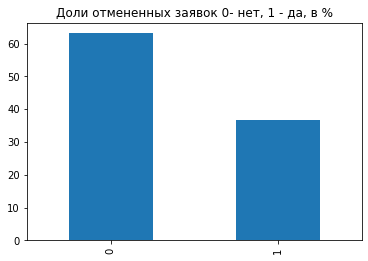

In [25]:
print('Тренировочный массив')
visualpt1(train)

Тестовый массив


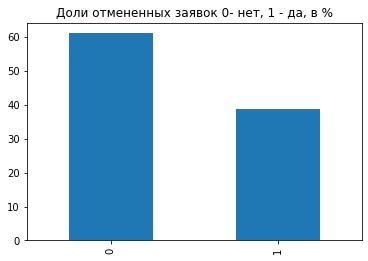

In [26]:
print('Тестовый массив')
visualpt1(test)

Соотношение отменных заявок и действующих одинаково как для train так и для test

произведем категоризацию атрибутов. Разделим на группы по целевому признаку на данные с 1 и 0

In [27]:
train1=train[train['is_canceled']==1]# массив с отмененными заявками из train

In [28]:
train0=train[train['is_canceled']==0]# массив с действующими заявками из train

Следющим действием рассмотрим различие между данными в этих подгруппах 

In [29]:
train1.describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,24044.000000,24044.0,24044.000000,24044.000000,24044.000000,24044.000000,24044.000000,24044.000000,24044.000000,24044.000000,24044.00000,24044.000000,24044.000000,24044.000000,24044.000000,24044.000000,24044.0,24044.000000,24044.000000
mean,35434.304691,1.0,137.621070,2015.700882,31.566545,15.826027,0.809807,2.243678,1.864956,0.067127,0.00341,0.018591,0.322243,0.028614,0.083181,5.145026,0.0,0.259566,3.053485
std,17544.975634,0.0,105.403765,0.457881,12.826655,8.737868,0.851764,1.279435,0.439328,0.323597,0.05830,0.135078,1.516086,0.814754,0.427968,20.748514,0.0,0.594623,1.639025
min,4.000000,1.0,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
25%,29400.750000,1.0,45.000000,2015.000000,22.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000
50%,37583.500000,1.0,107.500000,2016.000000,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.000000
75%,43764.250000,1.0,221.000000,2016.000000,42.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000
max,79128.000000,1.0,374.000000,2016.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,1.00000,1.000000,26.000000,58.000000,16.000000,236.000000,0.0,4.000000,10.000000


In [30]:
train0.describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,41185.000000,41185.0,41185.000000,41185.000000,41185.000000,41185.000000,41185.000000,41185.000000,41185.000000,41185.000000,41185.000000,41185.000000,41185.000000,41185.000000,41185.000000,41185.000000,41185.000000,41185.000000,41185.00000
mean,48278.588467,0.0,72.236615,2015.729610,31.207381,15.860532,0.834163,2.213767,1.820007,0.079422,0.009469,0.032148,0.016050,0.153891,0.259123,2.277383,0.089717,0.660580,3.04793
std,28260.513330,0.0,81.076915,0.444167,13.820976,8.754279,0.854358,1.397112,0.501859,0.340226,0.116014,0.176394,0.315382,1.547304,0.663465,16.509228,0.286967,0.794587,1.79344
min,0.000000,0.0,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,17376.000000,0.0,8.000000,2015.000000,20.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
50%,61964.000000,0.0,41.000000,2016.000000,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000
75%,73515.000000,0.0,110.000000,2016.000000,42.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.00000
max,84121.000000,0.0,373.000000,2016.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,10.000000,1.000000,13.000000,57.000000,17.000000,259.000000,3.000000,5.000000,10.00000


Что мы видим, а видим мы несогласованность групп, для данного случая будем использовать downsampling, так как количество образцов искомого целевого признака примерно в 2 раза меньше, чем группа потенциальных значений (0). Либо просто укажем в параметре модели, что модель имеет смещение в таргете в сторону 0,т.е параметры не сбалансированы. 

P.S. так  как ранее, мы выявили, что поле id является индексом строки в таблицы стоит проверить поля на дубликаты после сброса ID, вероятны явные дубликаты

определим список интересующих полей для решения задачи проекта и немного порассуждаем

В таблицах hotel_train и hotel_test содержатся одинаковые столбцы:


`id` — номер записи; -дропаем, не представляет интереса


`adults` — количество взрослых постояльцев; влияет на цену


`arrival_date_year` — год заезда; - дропаем, но для визуализации посмотрим


`arrival_date_month` — месяц заезда; влияет на цену


`arrival_date_week_number` — неделя заезда; дропаем


`arrival_date_day_of_month` — день заезда; влияет на цену


`babies` — количество младенцев; влияет на цену


`booking_changes` — количество изменений параметров заказа; -оставим данное поле


`children` — количество детей от 3 до 14 лет; -влияет на цену


`country` — гражданство постояльца; возможна зависимость от дохода, сезонности, удаленности региона проживания


`customer_type` — тип заказчика:  - проверить данное поле так как вероятно, что это категория пользователя


`Contract` — договор с юридическим лицом; - проверить данное поле так как вероятно, что это категория пользователя


`Group` — групповой заезд; - проверить данное поле так как вероятно, что это категория пользователя


`Transient` — не связано с договором или групповым заездом; - проверить данное поле так как вероятно, что это категория пользователя


`Transient-party` — не связано с договором или групповым заездом, но связано с бронированием типа Transient.- проверить данное поле так как вероятно, что это категория пользователя



`days_in_waiting_list` — сколько дней заказ ожидал подтверждения; важная метрика -  потенциально больше- хуже


`distribution_channel` — канал дистрибуции заказа; категория заказа +- важный признак


`is_canceled` — отмена заказа; - таргет


`is_repeated_guest` — признак того, что гость бронирует номер второй раз; - важный признак


`lead_time` — количество дней между датой бронирования и датой прибытия; - важный признак


`meal` — опции заказа: - обед, влияет на стоимость


`SC` — нет дополнительных опций;  категории обеда ?


`BB` — включён завтрак; категории обеда ?


`HB` — включён завтрак и обед; категории обеда ?


`FB` — включён завтрак, обед и ужин. категории обеда ?


`previous_bookings_not_canceled` — количество подтверждённых заказов у клиента; важный критерий


`previous_cancellations` — количество отменённых заказов у клиента; -важный критерий


`required_car_parking_spaces` — необходимость места для автомобиля; +- категория по доходу юзера


`reserved_room_type` — тип забронированной комнаты; +- категория юзера + статистика по заказам номеров определенного типа


`stays_in_weekend_nights` — количество ночей в выходные дни;  - требует дополнительного пояснения- низкое качество описания критерия


`stays_in_week_nights` — количество ночей в будние дни;- требует дополнительного пояснения- низкое качество описания критерия


`total_nights` — общее количество ночей; - критерий, влияющий на стоимость заказа


`total_of_special_requests` — количество специальных отметок. - требует дополнительного пояснения- низкое качество описания критерия

Стоимость номеров отеля:
категория A: за ночь — 1 000, разовое обслуживание — 400;
категория B: за ночь — 800, разовое обслуживание — 350;
категория C: за ночь — 600, разовое обслуживание — 350;
категория D: за ночь — 550, разовое обслуживание — 150;
категория E: за ночь — 500, разовое обслуживание — 150;
категория F: за ночь — 450, разовое обслуживание — 150;
категория G: за ночь — 350, разовое обслуживание — 150.

Рассмотрим вариант, когда у нас в системе 3 объекта 1 клиент  2- номер 3- заказ

Таки по количеству  атрибутов объектов, вероятнее всего  получается, что у нас  система из 2 х объектов (клиент и заказ)

Включаем серое вещество 2 раз и переносим из объекта номер в заказ атрибут reserved_room_type

Атрибуты клиента - country,is_repeated_guest,previous_bookings_not_canceled,previous_cancellations 

Атрибуты заказа - arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,

children,babies,customer_type,previous_bookings_not_canceled,previous_cancellations,days_in_waiting_list,

distribution_channel,is_canceled,lead_time,meal,required_car_parking_spaces,reserved_room_type,stays_in_weekend_nights,

stays_in_week_nights,total_nights,total_of_special_requests

Система из трех объектов (Клиент, номер, заказ) предоставляет несколько преимуществ:

1. Качественное разделение атрибутов позволяет более точно выявить проблемы и разработать корректирующие меры. Например, если отток клиентов зависит от качества номера и его расположения, то мы сможем легко выделить эту зависимость, анализируя атрибуты номера.

2. Разделение объектов позволяет избежать перегрузки модели лишними фичами. Каждый объект имеет свои уникальные атрибуты, и их разделение упрощает анализ и обработку данных.

3. Система обеспечивает стандартизацию и упрощает функционал потенциальной системы управления. Каждый объект имеет свои характеристики, что упрощает автоматизацию проверки и управление данными.

4. Система позволяет более точно учитывать различные аспекты задачи, такие как ревенью и стоимость уборки, которые связаны с атрибутами номера.

Таким образом, разделение данных на три объекта улучшает качество анализа и обработки информации, делая модель более точной и эффективной для решения поставленных задач.

По результатам анализа атрибутов `arrival_date_year`, `arrival_date_month`, `arrival_date_week_number` и `arrival_date_day_of_month` было принято решение удалить атрибут `arrival_date_year`, так как он обычно имеет цикличный характер и не несет большой информации, особенно при наличии других атрибутов, связанных с месяцем и днем заезда.

Оставление атрибута `arrival_date_week_number` или комбинации `arrival_date_month` и `arrival_date_day_of_month` зависит от конкретных целей анализа. Если важен сезонный характер данных и связь с неделями года, то `arrival_date_week_number` может быть полезным. Если более важны месяц и день в отношении стоимости и других аспектов заказа, то лучше оставить `arrival_date_month` и `arrival_date_day_of_month`.

Таким образом, удаление года и выбор между `arrival_date_week_number` и `arrival_date_month` и `arrival_date_day_of_month` позволяют упростить модель и сосредоточиться на более информативных атрибутах.

In [31]:
#profile_train = train.profile_report(title='Train Profiling Report', progress_bar=False)
#profile_train

Группы алертов до сброса id для train и test

Массив train


Анализ массива train выявил следующие характеристики и проблемы в данных:

1. `country` имеет высокую кардинальность с 155 различными значениями, что может усложнить обработку и моделирование. High cardinality.

2. `id` сильно коррелирует с `is_canceled` и еще одним атрибутом, что может повлиять на модель. High correlation.

3. `arrival_date_week_number` сильно коррелирует с `arrival_date_month`. High correlation.

4. `stays_in_week_nights` сильно коррелирует с `total_nights`. High correlation.

5. `total_nights` сильно коррелирует с `stays_in_week_nights` и еще одним атрибутом. High correlation.

6. `is_canceled` сильно коррелирует с `id`. High correlation.

7. `arrival_date_year` сильно коррелирует с `id`. High correlation.

8. `arrival_date_month` сильно коррелирует с `arrival_date_week_number`. High correlation.

9. `stays_in_weekend_nights` сильно коррелирует с `total_nights`. High correlation.

10. `adults`, `children`, `babies`, `meal`, `country`, `distribution_channel`, `is_repeated_guest`, `reserved_room_type`, и `required_car_parking_spaces` имеют высокую несбалансированность. Imbalance.

11. `previous_cancellations` и `previous_bookings_not_canceled` имеют высокую асимметрию (скошенность) данных. Skewed.

12. `id` имеет уникальные значения. Unique.

13. `lead_time`, `stays_in_week_nights`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`, и `total_of_special_requests` содержат много нулевых значений. Zeros.

Эти характеристики и проблемы данных важно учитывать при дальнейшей обработке и моделировании данных, а также при принятии решений о том, какие признаки использовать в модели.

In [32]:
#profile_test = test.profile_report(title='Test Profiling Report', progress_bar=False)
#profile_test

Анализ массива test выявил следующие характеристики и проблемы в данных:

1. `arrival_date_year` имеет постоянное значение "2017", что делает этот атрибут неинформативным. Constant.

2. `country` имеет высокую кардинальность с 143 различными значениями, что может усложнить обработку и моделирование. High cardinality.

3. `id` сильно коррелирует с `is_canceled` и еще одним атрибутом, что может повлиять на модель. High correlation.

4. `arrival_date_week_number` сильно коррелирует с `arrival_date_month`. High correlation.

5. `stays_in_week_nights` сильно коррелирует с `total_nights`. High correlation.

6. `total_nights` сильно коррелирует с `stays_in_week_nights` и еще одним атрибутом. High correlation.

7. `is_canceled` сильно коррелирует с `id`. High correlation.

8. `arrival_date_month` сильно коррелирует с `arrival_date_week_number`. High correlation.

9. `stays_in_weekend_nights` сильно коррелирует с `total_nights`. High correlation.

10. `is_repeated_guest` сильно коррелирует с `id`. High correlation.

11. `adults`, `children`, `babies`, `meal`, `distribution_channel`, `reserved_room_type`, и `customer_type` имеют высокую несбалансированность. Imbalance.

12. `previous_cancellations`, `previous_bookings_not_canceled`, и `days_in_waiting_list` имеют высокую асимметрию (скошенность) данных. Skewed.

13. `id` имеет уникальные значения. Unique.

14. `lead_time`, `stays_in_week_nights`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`, и `total_of_special_requests` содержат много нулевых значений. Zeros.

Эти характеристики и проблемы данных важно учитывать при дальнейшей обработке и моделировании данных, а также при принятии решений о том, какие признаки использовать в модели.

In [33]:
train=train.drop(['id'],axis=1)
test=test.drop(['id'],axis=1)

In [34]:
#profile_train = train.profile_report(title='Train Profiling Report', progress_bar=False)
#profile_train

Анализ массива train после удаления поля `id` выявил следующие характеристики и проблемы в данных:

1. Датасет содержит 5006 (7.7%) дублирующихся строк. Это может потребовать дополнительной обработки данных. Duplicates.

2. `country` имеет высокую кардинальность с 155 различными значениями, что может усложнить обработку и моделирование. High cardinality.

3. `arrival_date_week_number` сильно коррелирует с `arrival_date_month`. High correlation.

4. `stays_in_week_nights` сильно коррелирует с `total_nights`. High correlation.

5. `total_nights` сильно коррелирует с `stays_in_week_nights` и еще одним атрибутом. High correlation.

6. `arrival_date_month` сильно коррелирует с `arrival_date_week_number`. High correlation.

7. `stays_in_weekend_nights` сильно коррелирует с `total_nights`. High correlation.

8. `adults`, `children`, `babies`, `meal`, `country`, `distribution_channel`, `is_repeated_guest`, `reserved_room_type`, и `required_car_parking_spaces` имеют высокую несбалансированность. Imbalance.

9. `previous_cancellations` и `previous_bookings_not_canceled` имеют высокую асимметрию (скошенность) данных. Skewed.

10. `lead_time`, `stays_in_week_nights`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`, и `total_of_special_requests` содержат много нулевых значений. Zeros.

Эти характеристики и проблемы данных важно учитывать при дальнейшей обработке и моделировании данных, а также при принятии решений о том, какие признаки использовать в модели.

In [35]:
#profile_test = test.profile_report(title='Test Profiling Report', progress_bar=False)
#profile_test

Анализ массива test после удаления поля `id` выявил следующие характеристики и проблемы в данных:

1. `arrival_date_year` имеет постоянное значение "2017", что означает отсутствие вариации в этом признаке. Constant.

2. Датасет содержит 2398 (7.4%) дублирующихся строк. Это может потребовать дополнительной обработки данных. Duplicates.

3. `country` имеет высокую кардинальность с 143 различными значениями, что может усложнить обработку и моделирование. High cardinality.

4. `arrival_date_week_number` сильно коррелирует с `arrival_date_month`. High correlation.

5. `stays_in_week_nights` сильно коррелирует с `total_nights`. High correlation.

6. `total_nights` сильно коррелирует с `stays_in_week_nights` и еще одним атрибутом. High correlation.

7. `arrival_date_month` сильно коррелирует с `arrival_date_week_number`. High correlation.

8. `adults`, `children`, `babies`, `meal`, `distribution_channel`, `is_repeated_guest`, `reserved_room_type`, `customer_type`, и `required_car_parking_spaces` имеют высокую несбалансированность. Imbalance.

9. `previous_cancellations` и `previous_bookings_not_canceled` имеют высокую асимметрию (скошенность) данных. Skewed.

10. `lead_time`, `stays_in_week_nights`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`, и `total_of_special_requests` содержат много нулевых значений. Zeros.

Эти характеристики и проблемы данных также важно учитывать при дальнейшей обработке и моделировании данных, а также при принятии решений о том, какие признаки использовать в модели.

Дропаем дубликаты

In [36]:
train=train.drop_duplicates()
test=test.drop_duplicates()

In [37]:
#profile_train = train.profile_report(title='Train Profiling Report', progress_bar=False)
#profile_train

In [38]:
#profile_test = test.profile_report(title='Test Profiling Report', progress_bar=False)
#profile_test

In [39]:
train=train.drop(['country'],axis=1)
test=test.drop(['country'],axis=1)

In [40]:
#profile_train = train.profile_report(title='Train Profiling Report', progress_bar=False)
#profile_train

In [41]:
#profile_test = test.profile_report(title='Test Profiling Report', progress_bar=False)
#profile_test

In [42]:
train=train.drop_duplicates()
test=test.drop_duplicates()

In [43]:
#profile_train = train.profile_report(title='Train Profiling Report', progress_bar=False)
#profile_train

In [44]:
#profile_test = test.profile_report(title='Test Profiling Report', progress_bar=False)
#profile_test

arrival_date_week_number is highly overall correlated with arrival_date_month

Делаем следующее, оставляем arrival_date_week_number,

In [45]:
#profile_train = train.profile_report(title='Train Profiling Report', progress_bar=False)
#profile_train

так-с, подождите, нам поле  arrival_month безразлично, так как у нас есть номер недели, который однозначно определяет коэффициент сезонности

продолжим дропать поля

In [46]:
train.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights'],
      dtype='object')

`stays_in_week_nights`,'`stays_in_weekend_nights`' - дропаем тк, дубликат поля `total_nights`

In [47]:
train=train.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1)
test=test.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1)

'arrival_date_year' -дропаем, для модели, с учетом того, что у нас сезонность не важно какой год (наблюдается цикличность, то есть каждый год одно и то же)

In [48]:
train=train.drop(['arrival_date_year'],axis=1)
test=test.drop(['arrival_date_year'],axis=1)

поля '`adults`', '`children`', '`babies`',  - тут немного интересней 

Есть лиу нас заказы, где нет взрослых ?

In [49]:
train[train['adults']==0].shape

(163, 20)

Такие заказы есть 163 записи в train 

In [50]:
test[test['adults']==0].shape

(65, 20)

65 в test

Что у них общего, наверное тип клиента будет корпо или будет совпадать канал дистрибуции или кастомер тайп. Сейчас узнаем

In [51]:
#profile_train_zeroadults = train[train['adults']==0].profile_report(title='Train Zero adults', progress_bar=False)
#profile_train_zeroadults

In [52]:
#profile_test_zeroadults = test[test['adults']==0].profile_report(title='Test Zero adults', progress_bar=False)
#profile_test_zeroadults

`Transient` - кастомер тайп, дело раскрыто. 

Ладно, время дорого дропаем записи(объем битых записей мал, поэтому дропаем), где adults==0. 

In [53]:
train=train[train['adults']!=0]
test=test[test['adults']!=0]

поле '`meal`' - дропаем 

In [54]:
train=train.drop(['meal'],axis=1)
test=test.drop(['meal'],axis=1)

`'meal','distribution_channel'`

In [1]:
train.columns

NameError: name 'train' is not defined

`'distribution_channel'` и `'customer_type'` тоже отправляем в утиль ибо кому какое дело, откуда пришел клиент, главное, чтобы не отказался от заезда. Наша цель - точная модель и прибыль, поэтому дропаем. К тому же лишние категориальные переменные- лишние проблемы при моделировании

In [56]:
train=train.drop(['distribution_channel','customer_type'],axis=1)
test=test.drop(['distribution_channel','customer_type'],axis=1)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42307 entries, 0 to 65228
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     42307 non-null  int64  
 1   lead_time                       42307 non-null  float64
 2   arrival_date_month              42307 non-null  object 
 3   arrival_date_week_number        42307 non-null  int64  
 4   arrival_date_day_of_month       42307 non-null  int64  
 5   adults                          42307 non-null  float64
 6   children                        42307 non-null  float64
 7   babies                          42307 non-null  float64
 8   is_repeated_guest               42307 non-null  int64  
 9   previous_cancellations          42307 non-null  int64  
 10  previous_bookings_not_canceled  42307 non-null  int64  
 11  reserved_room_type              42307 non-null  object 
 12  booking_changes                 

Делаем ход конем,
#Функция добавляет в категориальные: price_class, service, 'season_coeff' и 'revenue' и 'potential_loss' из условий задачи'
#Функция кодирует 'arrival_date_month' путем замены на порядковый номер месяца по типу месяца

In [58]:
#Функция добавляет в категориальные: price_class, service, 'season_coeff' и 'revenue' и 'potential_loss' из условий задачи'
#Функция кодирует 'arrival_date_month' путем замены на порядковый номер месяца по типу месяца 
def price_class(df):
    df.loc[df['reserved_room_type'].str.contains('A'), 'price_class'] = 1000
    df.loc[df['reserved_room_type'].str.contains('A'), 'service'] = 400
    
    df.loc[df['reserved_room_type'].str.contains('B'), 'price_class'] = 800
    df.loc[df['reserved_room_type'].str.contains('B'), 'service'] = 350
    
    df.loc[df['reserved_room_type'].str.contains('C'), 'price_class'] = 600
    df.loc[df['reserved_room_type'].str.contains('C'), 'service'] = 350
    
    df.loc[df['reserved_room_type'].str.contains('D'), 'price_class'] = 550
    df.loc[df['reserved_room_type'].str.contains('D'), 'service'] = 150
    
    df.loc[df['reserved_room_type'].str.contains('E'), 'price_class'] = 500
    df.loc[df['reserved_room_type'].str.contains('E'), 'service'] = 150
    
    df.loc[df['reserved_room_type'].str.contains('F'), 'price_class'] = 450
    df.loc[df['reserved_room_type'].str.contains('F'), 'service'] = 150
    
    df.loc[df['reserved_room_type'].str.contains('G'), 'price_class'] = 350
    df.loc[df['reserved_room_type'].str.contains('G'), 'service'] = 150
    
    df.loc[df['reserved_room_type'].str.contains('G'), 'price_class'] = 350
    df.loc[df['reserved_room_type'].str.contains('G'), 'service'] = 150
    
     
    df.loc[df['arrival_date_month'].str.contains('June'), 'season_coeff'] = 1.4
    df.loc[df['arrival_date_month'].str.contains('July'), 'season_coeff'] = 1.4
    df.loc[df['arrival_date_month'].str.contains('August'), 'season_coeff'] = 1.4
    
    df.loc[df['arrival_date_month'].str.contains('September'), 'season_coeff'] = 1.2
    df.loc[df['arrival_date_month'].str.contains('October'), 'season_coeff'] = 1.2
    df.loc[df['arrival_date_month'].str.contains('November'), 'season_coeff'] = 1.2
    
    df.loc[df['arrival_date_month'].str.contains('December'), 'season_coeff'] = 1
    df.loc[df['arrival_date_month'].str.contains('January'), 'season_coeff'] = 1
    df.loc[df['arrival_date_month'].str.contains('February'), 'season_coeff'] = 1
    
    df.loc[df['arrival_date_month'].str.contains('March'), 'season_coeff'] = 1.2
    df.loc[df['arrival_date_month'].str.contains('April'), 'season_coeff'] = 1.2
    df.loc[df['arrival_date_month'].str.contains('May'), 'season_coeff'] = 1.2
    
    df.loc[df['arrival_date_month'].str.contains('June'), 'arrival_month'] = 6
    df.loc[df['arrival_date_month'].str.contains('July'), 'arrival_month'] = 7
    df.loc[df['arrival_date_month'].str.contains('August'), 'arrival_month'] = 8
    
    df.loc[df['arrival_date_month'].str.contains('September'), 'arrival_month'] = 9
    df.loc[df['arrival_date_month'].str.contains('October'), 'arrival_month'] = 10
    df.loc[df['arrival_date_month'].str.contains('November'), 'arrival_month'] = 11
    
    df.loc[df['arrival_date_month'].str.contains('December'), 'arrival_month'] = 12
    df.loc[df['arrival_date_month'].str.contains('January'), 'arrival_month'] = 1
    df.loc[df['arrival_date_month'].str.contains('February'), 'arrival_month'] = 2
    
    df.loc[df['arrival_date_month'].str.contains('March'), 'arrival_month'] = 3
    df.loc[df['arrival_date_month'].str.contains('April'), 'arrival_month'] = 4
    df.loc[df['arrival_date_month'].str.contains('May'), 'arrival_month'] = 5
    
    df=df.drop(['arrival_date_month'],axis=1)
    df['revenue']=(df['total_nights']*df['price_class']*df['season_coeff']-(np.ceil(df['total_nights']/2))*df['service'])
    df['potential_loss']=-(df['service']+df['price_class']*df['season_coeff'])
    
    
    return df

In [59]:
train=price_class(train)
test=price_class(test)

Дропаем reserved_room_type, у нас есть price_class

In [60]:
train=train.drop(['reserved_room_type'],axis=1)
test=test.drop(['reserved_room_type'],axis=1)

Предварительно радуемся, избавились от фичей с типом object и как результат танцев с бубном. и заодно решили примерно 60 процентов задачи

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42307 entries, 0 to 65228
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     42307 non-null  int64  
 1   lead_time                       42307 non-null  float64
 2   arrival_date_week_number        42307 non-null  int64  
 3   arrival_date_day_of_month       42307 non-null  int64  
 4   adults                          42307 non-null  float64
 5   children                        42307 non-null  float64
 6   babies                          42307 non-null  float64
 7   is_repeated_guest               42307 non-null  int64  
 8   previous_cancellations          42307 non-null  int64  
 9   previous_bookings_not_canceled  42307 non-null  int64  
 10  booking_changes                 42307 non-null  int64  
 11  days_in_waiting_list            42307 non-null  int64  
 12  required_car_parking_spaces     

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24163 entries, 0 to 32411
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     24163 non-null  int64  
 1   lead_time                       24163 non-null  float64
 2   arrival_date_week_number        24163 non-null  int64  
 3   arrival_date_day_of_month       24163 non-null  int64  
 4   adults                          24163 non-null  float64
 5   children                        24163 non-null  float64
 6   babies                          24163 non-null  float64
 7   is_repeated_guest               24163 non-null  int64  
 8   previous_cancellations          24163 non-null  int64  
 9   previous_bookings_not_canceled  24163 non-null  int64  
 10  booking_changes                 24163 non-null  int64  
 11  days_in_waiting_list            24163 non-null  int64  
 12  required_car_parking_spaces     

In [63]:
train=train.drop_duplicates()
test=test.drop_duplicates()

In [64]:
#profile_train = train.profile_report(title='Train Profiling Report', progress_bar=False)
#profile_train

In [65]:
#profile_test = test.profile_report(title='Test Profiling Report', progress_bar=False)
#profile_test

In [66]:
train.columns

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights', 'price_class', 'service',
       'season_coeff', 'arrival_month', 'revenue', 'potential_loss'],
      dtype='object')

In [67]:
train['total_of_special_requests'].describe()


count    41595.000000
mean         0.685900
std          0.807018
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

После проведенных преобразований и классификации признаков, получаем следующее разделение:

- `is_canceled`: Таргет, бинарный признак (0 - не отменено, 1 - отменено).
- `lead_time`: Настоящий числовой признак.
- `arrival_date_week_number`: Категориальный признак.
- `arrival_date_day_of_month`: Категориальный признак.
- `adults`: Бинарный признак (0 - нет взрослых, 1 - есть взрослые).
- `children`: Бинарный признак (0 - нет детей, 1 - есть дети).
- `babies`: Бинарный признак (0 - нет младенцев, 1 - есть младенцы).
- `is_repeated_guest`: Категориальный бинарный признак (0 - не повторный гость, 1 - повторный гость).
- `previous_cancellations`: Настоящий числовой признак.
- `previous_bookings_not_canceled`: Настоящий числовой признак.
- `booking_changes`: Настоящий числовой признак.
- `days_in_waiting_list`: Настоящий числовой признак.
- `required_car_parking_spaces`: Категориальный бинарный признак (0 - не требуется место для автомобиля, 1 - требуется место для автомобиля).
- `total_of_special_requests`: Категориальный признак.
- `total_nights`: Настоящий числовой признак.
- `arrival_month`: Категориальный признак.

Таким образом, признаки были преобразованы и классифицированы в соответствии с их характером и целью использования в модели.

Исключим из признаков `'revenue'`, `'potential_loss'`, `'service'`, так как они представляют собой эрзац `'price_class'`, `'arrival_month'`, и `'season_coeff'` оставим, так как они были перекодированы и имеют информацию о ценовом классе, месяце прибытия и коэффициенте сезона.

In [68]:
train.columns

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights', 'price_class', 'service',
       'season_coeff', 'arrival_month', 'revenue', 'potential_loss'],
      dtype='object')

In [69]:
#profile_train = train.profile_report(title='Train Profiling Report', progress_bar=False)
#profile_train

In [70]:
#profile_test = test.profile_report(title='Test Profiling Report', progress_bar=False)
#profile_test

`arrival_date_week_number, arrival_month` -убираем, 

In [71]:
train=train.drop(['arrival_date_week_number', 'arrival_month'],axis=1)
test=test.drop(['arrival_date_week_number', 'arrival_month'],axis=1)

In [72]:
#profile_train = train.profile_report(title='Train Profiling Report', progress_bar=False)
#profile_train

In [73]:
#profile_test = test.profile_report(title='Test Profiling Report', progress_bar=False)
#profile_test

Еще дропаем дубликаты

In [74]:
train=train.drop_duplicates()
test=test.drop_duplicates()

In [75]:
#profile_train = train.profile_report(title='Train Profiling Report', progress_bar=False)
#profile_train

In [76]:
#profile_test = test.profile_report(title='Test Profiling Report', progress_bar=False)
#profile_test

Проведем быструю визуализацию полей

In [77]:
# Функция вывода пределов для сброса по методу IQR принимает на вход массив.describe() из числовых значений
# Рекомендация  использовать значения типа float | int 
# индекс- колонка с названием исходного столбца для нашего случая 
#'index','CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary'
def iqr(stat_df_describe):
    stat_df_describe=pd.DataFrame(stat_df_describe.describe())
    stat_df_describe=stat_df_describe.reset_index(drop=True)
    top_limit=[]
    bot_limit=[]
    columns_lst=[]
    for value in stat_df_describe.columns:
        limit_up=stat_df_describe[value][6]+1.5*(stat_df_describe[value][6]-stat_df_describe[value][4])
        limit_low=stat_df_describe[value][4]-1.5*(stat_df_describe[value][6]-stat_df_describe[value][4])
        top_limit.append(limit_up)
        bot_limit.append(limit_low)
        columns_lst.append(value)
        dictionary={'Columns':columns_lst, 'Top_limit':top_limit,'Bot_limit':bot_limit}
        a=pd.DataFrame(dictionary)
                
        
    return a

In [78]:
train_lim=iqr(train)
train_lim

,Columns,Top_limit,Bot_limit
0,is_canceled,2.5,-1.5
1,lead_time,243.5,-128.5
2,arrival_date_day_of_month,48.0,-16.0
3,adults,2.0,2.0
4,children,0.0,0.0
5,babies,0.0,0.0
6,is_repeated_guest,0.0,0.0
7,previous_cancellations,0.0,0.0
8,previous_bookings_not_canceled,0.0,0.0
9,booking_changes,0.0,0.0


In [79]:
test_lim=iqr(test)
test_lim

,Columns,Top_limit,Bot_limit
0,is_canceled,2.5,-1.5
1,lead_time,337.0,-175.0
2,arrival_date_day_of_month,45.5,-14.5
3,adults,2.0,2.0
4,children,0.0,0.0
5,babies,0.0,0.0
6,is_repeated_guest,0.0,0.0
7,previous_cancellations,0.0,0.0
8,previous_bookings_not_canceled,0.0,0.0
9,booking_changes,0.0,0.0


Для фильтрации берем только поля типа тру нумерик, например total_nights

In [80]:
train.shape

(40493, 19)

In [81]:
train=train[train['total_nights']<=7]

In [82]:
train.shape

(39795, 19)

In [83]:
test.shape

(23742, 19)

In [84]:
test=test[test['total_nights']<=7]

In [85]:
test.shape

(23438, 19)

In [86]:
#profile_train = train.profile_report(title='Train Profiling Report', progress_bar=False)
#profile_train

In [87]:
#profile_test = test.profile_report(title='Test Profiling Report', progress_bar=False)
#profile_test

Перейдем к лидтайму

так-с, а в лидтайме то у нас нули и их много, выброс, видимо, ладно, давайте посмотрим что там не так

`lead_time` — количество дней между датой бронирования и датой прибытия; - важный признак

Юзеры бронируют день в день, таки это аномалия, в норме такое случается крайне редко - дропаем строки с lead_time =0

In [88]:
train=train[train['lead_time']>0]
test=test[test['lead_time']>0]

In [89]:
train=train.dropna()
test=test.dropna()

In [90]:
#profile_train = train.profile_report(title='Train Profiling Report', progress_bar=False)
#profile_train

In [91]:
#profile_test = test.profile_report(title='Test Profiling Report', progress_bar=False)
#profile_test

In [92]:
#Дропаем синтетику
#train=train.drop(['revenue', 'potential_loss', 'service'],axis=1)
#test=test.drop(['revenue', 'potential_loss', 'service'],axis=1)

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37541 entries, 0 to 65228
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     37541 non-null  int64  
 1   lead_time                       37541 non-null  float64
 2   arrival_date_day_of_month       37541 non-null  int64  
 3   adults                          37541 non-null  float64
 4   children                        37541 non-null  float64
 5   babies                          37541 non-null  float64
 6   is_repeated_guest               37541 non-null  int64  
 7   previous_cancellations          37541 non-null  int64  
 8   previous_bookings_not_canceled  37541 non-null  int64  
 9   booking_changes                 37541 non-null  int64  
 10  days_in_waiting_list            37541 non-null  int64  
 11  required_car_parking_spaces     37541 non-null  int64  
 12  total_of_special_requests       

Рассмотрим оригинальный массив  и сравним с тем, что мы получили посредством вышеизложенных действий


In [94]:
try:
    train_alfa= pd.read_csv('/datasets/hotel_train.csv')
    test_alfa= pd.read_csv('/datasets/hotel_test.csv')
except:
    train_alfa= pd.read_csv(r'C:\Users\Admin\Desktop\hotel PRoject\hotel_train.csv')
    test_alfa= pd.read_csv(r'C:\Users\Admin\Desktop\hotel PRoject\hotel_test.csv')

In [95]:
train.shape

(37541, 19)

In [96]:
train_alfa.shape

(65229, 25)

In [97]:
test.shape

(22326, 19)

In [98]:
test_alfa.shape

(32412, 25)

In [99]:
train.columns

Index(['is_canceled', 'lead_time', 'arrival_date_day_of_month', 'adults',
       'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights', 'price_class', 'service',
       'season_coeff', 'revenue', 'potential_loss'],
      dtype='object')

In [100]:
train_alfa.columns

Index(['id', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights'],
      dtype='object')

In [101]:
#profile_train = train.profile_report(title='Train Profiling Report', progress_bar=False)
#profile_train

In [102]:
#profile_test = test.profile_report(title='Test Profiling Report', progress_bar=False)
#profile_test

In [103]:
display(train.describe())

,is_canceled,lead_time,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,price_class,service,season_coeff,revenue,potential_loss
count,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000
mean,0.280360,72.469140,15.948243,1.893823,0.109347,0.011534,0.026877,0.044485,0.143896,0.249834,0.764364,0.082923,0.714366,3.280680,851.507685,323.796649,1.219025,2746.898324,-1361.201087
std,0.449181,73.306561,8.887227,0.483306,0.395032,0.126002,0.161727,0.480901,1.578328,0.693255,9.437117,0.277022,0.815345,1.760829,220.399131,114.229806,0.132278,1732.679776,397.281973
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,350.000000,150.000000,1.000000,200.000000,-1800.000000
25%,0.000000,15.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,550.000000,150.000000,1.200000,1500.000000,-1600.000000
50%,0.000000,48.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1000.000000,400.000000,1.200000,2400.000000,-1600.000000
75%,1.000000,108.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1000.000000,400.000000,1.400000,3800.000000,-920.000000
max,1.000000,374.000000,31.000000,4.000000,3.000000,10.000000,1.000000,26.000000,58.000000,17.000000,259.000000,3.000000,5.000000,7.000000,1000.000000,400.000000,1.400000,8200.000000,-500.000000


In [104]:
train.loc[train['is_canceled']==1, 'true_revenue'] = train['potential_loss']
train.loc[train['is_canceled']==0, 'true_revenue'] = train['revenue']

In [105]:
test.loc[test['is_canceled']==1, 'true_revenue'] = test['potential_loss']
test.loc[test['is_canceled']==0, 'true_revenue'] = test['revenue']

In [106]:
print('прибыль отеля до внедрения депозитов для train',train['true_revenue'].sum()/1000,'тыс.рублей')

прибыль отеля до внедрения депозитов для train 59126.32 тыс.рублей


In [107]:
print('прибыль отеля до внедрения депозитов для test',test['true_revenue'].sum()/1000,'тыс.рублей')

прибыль отеля до внедрения депозитов для test 30827.09 тыс.рублей


In [108]:
train.loc[train['adults']>=1, 'adults'] = 1
train.loc[train['adults']==0, 'adults'] = 0
test.loc[test['adults']>=1, 'adults'] = 1
test.loc[test['adults']==0, 'adults'] = 0

In [109]:
train.loc[train['children']>=1, 'children'] = 1
train.loc[train['children']==0, 'children'] = 0
test.loc[test['children']>=1, 'children'] = 1
test.loc[test['children']==0, 'children'] = 0

In [110]:
train.loc[train['babies']>=1, 'babies'] = 1
train.loc[train['babies']==0, 'babies'] = 0
test.loc[test['babies']>=1, 'babies'] = 1
test.loc[test['babies']==0, 'babies'] = 0

In [111]:
train.loc[train['is_repeated_guest']>=1, 'is_repeated_guest'] = 1
train.loc[train['is_repeated_guest']==0, 'is_repeated_guest'] = 0
test.loc[test['is_repeated_guest']>=1, 'is_repeated_guest'] = 1
test.loc[test['is_repeated_guest']==0, 'is_repeated_guest'] = 0

In [112]:
train.loc[train['required_car_parking_spaces']>=1, 'required_car_parking_spaces'] = 1
train.loc[train['required_car_parking_spaces']==0, 'required_car_parking_spaces'] = 0
test.loc[test['required_car_parking_spaces']>=1, 'required_car_parking_spaces'] = 1
test.loc[test['required_car_parking_spaces']==0, 'required_car_parking_spaces'] = 0

In [113]:
train.loc[train['previous_cancellations']>=1, 'previous_cancellations'] = 1
train.loc[train['previous_cancellations']==0, 'previous_cancellations'] = 0
test.loc[test['previous_cancellations']>=1, 'previous_cancellations'] = 1
test.loc[test['previous_cancellations']==0, 'previous_cancellations'] = 0

In [114]:
train.loc[train['previous_bookings_not_canceled']>=1, 'previous_bookings_not_canceled'] = 1
train.loc[train['previous_bookings_not_canceled']==0, 'previous_bookings_not_canceled'] = 0
test.loc[test['previous_bookings_not_canceled']>=1, 'previous_bookings_not_canceled'] = 1
test.loc[test['previous_bookings_not_canceled']==0, 'previous_bookings_not_canceled'] = 0

In [115]:
train.loc[train['days_in_waiting_list']>=1, 'days_in_waiting_list'] = 1
train.loc[train['days_in_waiting_list']==0, 'days_in_waiting_list'] = 0
test.loc[test['days_in_waiting_list']>=1, 'days_in_waiting_list'] = 1
test.loc[test['days_in_waiting_list']==0, 'days_in_waiting_list'] = 0

In [116]:
train.loc[train['booking_changes']>=1, 'booking_changes'] = 1
train.loc[train['booking_changes']==0, 'booking_changes'] = 0
test.loc[test['booking_changes']>=1, 'booking_changes'] = 1
test.loc[test['booking_changes']==0, 'booking_changes'] = 0

In [117]:
train.loc[train['total_of_special_requests']>=1, 'total_of_special_requests'] = 1
train.loc[train['total_of_special_requests']==0, 'total_of_special_requests'] = 0
test.loc[test['total_of_special_requests']>=1, 'total_of_special_requests'] = 1
test.loc[test['total_of_special_requests']==0, 'total_of_special_requests'] = 0

In [118]:
train['adults']=train['adults'].astype('bool')
train['children']=train['children'].astype('bool')
train['babies']=train['babies'].astype('bool')
train['is_repeated_guest']=train['is_repeated_guest'].astype('bool')
train['required_car_parking_spaces']=train['required_car_parking_spaces'].astype('bool')
train['previous_cancellations']=train['previous_cancellations'].astype('bool')
train['previous_bookings_not_canceled']=train['previous_bookings_not_canceled'].astype('bool')
train['days_in_waiting_list']=train['days_in_waiting_list'].astype('bool')
train['booking_changes']=train['booking_changes'].astype('bool')
train['total_of_special_requests']=train['total_of_special_requests'].astype('bool')

test['adults']=test['adults'].astype('bool')
test['children']=test['children'].astype('bool')
test['babies']=test['babies'].astype('bool')
test['is_repeated_guest']=test['is_repeated_guest'].astype('bool')
test['required_car_parking_spaces']=test['required_car_parking_spaces'].astype('bool')
test['previous_cancellations']=test['previous_cancellations'].astype('bool')
test['previous_bookings_not_canceled']=test['previous_bookings_not_canceled'].astype('bool')
test['booking_changes']=test['booking_changes'].astype('bool')
test['days_in_waiting_list']=test['days_in_waiting_list'].astype('bool')

test['total_of_special_requests']=test['total_of_special_requests'].astype('bool')


       


In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37541 entries, 0 to 65228
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     37541 non-null  int64  
 1   lead_time                       37541 non-null  float64
 2   arrival_date_day_of_month       37541 non-null  int64  
 3   adults                          37541 non-null  bool   
 4   children                        37541 non-null  bool   
 5   babies                          37541 non-null  bool   
 6   is_repeated_guest               37541 non-null  bool   
 7   previous_cancellations          37541 non-null  bool   
 8   previous_bookings_not_canceled  37541 non-null  bool   
 9   booking_changes                 37541 non-null  bool   
 10  days_in_waiting_list            37541 non-null  bool   
 11  required_car_parking_spaces     37541 non-null  bool   
 12  total_of_special_requests       

In [120]:
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns.to_list()
numerical_features.remove('is_canceled')
numerical_features.remove('service')
numerical_features.remove('season_coeff')
numerical_features.remove('revenue')
numerical_features.remove('potential_loss')
categorical_features = train.select_dtypes(include=['object', 'bool']).columns.to_list()

In [121]:
train_feature=train.drop(['is_canceled'],axis=1)
train_target=train['is_canceled']


In [122]:
test_feature=test.drop(['is_canceled'],axis=1)
test_target=test['is_canceled']

In [123]:
train_feature=train.drop(['is_canceled'],axis=1)
train_target=train['is_canceled']
test_feature=test.drop(['is_canceled'],axis=1)
test_target=test['is_canceled']

In [124]:
train_alfa

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,84057,0,23.0,2016,December,53,30,2,4,2.0,...,0,0,0,D,0,0,Transient,0,2,6
65225,84063,0,53.0,2016,December,53,31,2,3,2.0,...,0,0,0,D,0,0,Transient,0,3,5
65226,84094,0,7.0,2016,December,53,31,2,4,2.0,...,0,0,0,D,0,0,Transient,0,1,6
65227,84117,0,17.0,2016,December,53,30,2,5,2.0,...,0,0,0,A,0,0,Transient,0,1,7


Повторно проводить анализ мы не будем. делаем сброс id

In [125]:
train=train_alfa

In [126]:
test=test_alfa

In [127]:
#дропаем id
train=train.drop(['id'],axis=1)
test=test.drop(['id'],axis=1)

In [128]:
train.duplicated().sum()

21377

In [129]:
test.duplicated().sum()

7717

In [130]:
#дропаем дубликаты
train=train.drop_duplicates()
test=test.drop_duplicates()

In [131]:
train.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_nights'],
      dtype='object')

In [132]:
top_20=pd.DataFrame(train['country'].value_counts().head(20))

In [133]:
top_20=pd.DataFrame(train['country'].value_counts().head(20))
top_20=top_20.reset_index()

In [134]:
top_20=pd.DataFrame(train['country'].value_counts().head(20))
top_20=top_20.reset_index()
top_20.drop(['country'],axis=1)

,index
0,PRT
1,FRA
2,GBR
3,ESP
4,DEU
5,ITA
6,IRL
7,BEL
8,NLD
9,BRA


In [135]:
top_20=pd.DataFrame(train['country'].value_counts().head(20))
top_20=top_20.reset_index()
top_20.drop(['country'],axis=1)
top_20['index'].to_list()

['PRT',
 'FRA',
 'GBR',
 'ESP',
 'DEU',
 'ITA',
 'IRL',
 'BEL',
 'NLD',
 'BRA',
 'USA',
 'CHE',
 'AUT',
 'CHN',
 'CN',
 'POL',
 'SWE',
 'RUS',
 'FIN',
 'ROU']

In [136]:
top_20=pd.DataFrame(train['country'].value_counts().head(20))
top_20=top_20.reset_index()
top_20.drop(['country'],axis=1)
top_20['index'].to_list()
test.loc[(test['country'] .isin(top_20['index'].to_list()))==False, 'country'] = 'OTHER'
train.loc[(train['country'] .isin(top_20['index'].to_list()))==False, 'country'] = 'OTHER'

In [137]:
test['country'].unique()

array(['PRT', 'AUT', 'BEL', 'DEU', 'BRA', 'GBR', 'ESP', 'FRA', 'ITA',
       'OTHER', 'CHE', 'IRL', 'CN', 'POL', 'NLD', 'ROU', 'USA', 'FIN',
       'RUS', 'SWE', 'CHN'], dtype=object)

Уже лучше, а не +100500 категорий стран

Продолжим фиксить это 

In [138]:
test.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_nights'],
      dtype='object')

In [139]:
train['distribution_channel'].value_counts()

TA/TO        35185
Direct        5822
Corporate     2755
GDS             90
Name: distribution_channel, dtype: int64

In [140]:
test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24695 entries, 0 to 32411
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     24695 non-null  int64  
 1   lead_time                       24695 non-null  float64
 2   arrival_date_year               24695 non-null  int64  
 3   arrival_date_month              24695 non-null  object 
 4   arrival_date_week_number        24695 non-null  int64  
 5   arrival_date_day_of_month       24695 non-null  int64  
 6   stays_in_weekend_nights         24695 non-null  int64  
 7   stays_in_week_nights            24695 non-null  int64  
 8   adults                          24695 non-null  float64
 9   children                        24695 non-null  float64
 10  babies                          24695 non-null  float64
 11  meal                            24695 non-null  object 
 12  country                         

In [141]:
def stripp(df):
    df['arrival_date_month']=df['arrival_date_month'].str.strip()
    df['meal']=df['meal'].str.strip()
    df['country']=df['country'].str.strip()
    df['distribution_channel']=df['distribution_channel'].str.strip()
    df['reserved_room_type']=df['reserved_room_type'].str.strip()
    df['customer_type']=df['customer_type'].str.strip()
    
    return df
    
    
    


In [142]:
#Исключаем пробелы из категорий
train=stripp(train)
test=stripp(test)

In [143]:
train=train.drop([ 'arrival_date_week_number','stays_in_week_nights','stays_in_weekend_nights','arrival_date_year'],axis=1)
test=test.drop(['arrival_date_week_number','stays_in_week_nights','stays_in_weekend_nights','arrival_date_year'],axis=1)

In [144]:
train=train.drop_duplicates()
test=test.drop_duplicates()

In [145]:
train_lim=iqr(train)
train_lim

,Columns,Top_limit,Bot_limit
0,is_canceled,2.5,-1.5
1,lead_time,241.5,-130.5
2,arrival_date_day_of_month,48.0,-16.0
3,adults,2.0,2.0
4,children,0.0,0.0
5,babies,0.0,0.0
6,is_repeated_guest,0.0,0.0
7,previous_cancellations,0.0,0.0
8,previous_bookings_not_canceled,0.0,0.0
9,booking_changes,0.0,0.0


In [146]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43749 entries, 0 to 65228
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     43749 non-null  int64  
 1   lead_time                       43749 non-null  float64
 2   arrival_date_month              43749 non-null  object 
 3   arrival_date_day_of_month       43749 non-null  int64  
 4   adults                          43749 non-null  float64
 5   children                        43749 non-null  float64
 6   babies                          43749 non-null  float64
 7   meal                            43749 non-null  object 
 8   country                         43749 non-null  object 
 9   distribution_channel            43749 non-null  object 
 10  is_repeated_guest               43749 non-null  int64  
 11  previous_cancellations          43749 non-null  int64  
 12  previous_bookings_not_canceled  

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

Перед нами задача классификации с несбалансированными классами. Таргет is_canceled

Для решения задачи классификации с несбалансированными классами, где важны и точность, и полнота предсказаний, можно использовать F1-меру (F1-score). F1-мера является гармоническим средним между точностью (precision) и полнотой (recall). Эта метрика позволяет балансировать компромисс между предсказаниями и избегать слишком большого количества ложных срабатываний или ложных отказов.

F1-мера вычисляется по следующей формуле:

F1 = 2 * (precision * recall) / (precision + recall)

Где:

Precision (точность) - это отношение правильно предсказанных положительных классов к общему числу предсказанных положительных классов.
Recall (полнота) - это отношение правильно предсказанных положительных классов к общему числу истинных положительных классов.
Оптимизируя F1-меру, мы сможем достичь баланса между минимизацией ложных срабатываний и ложных отказов, что поможет вам максимизировать прибыль и рейтинг отеля.

Таким образом, при оценке и выборе моделей, а также при настройке гиперпараметров, вы можете использовать F1-меру в качестве основной метрики для оценки качества вашей классификационной модели.

In [147]:
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns.to_list()
numerical_features.remove('is_canceled')

categorical_features = train.select_dtypes(include=['object', 'bool']).columns.to_list()

train_features=train.drop(['is_canceled'],axis=1)
train_target=train['is_canceled']
test_features=test.drop(['is_canceled'],axis=1)
test_target=test['is_canceled']

encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(train_features[categorical_features])
#добавляем закодированные признаки в features,возвращаем названия features
train_features[encoder.get_feature_names_out()] = encoder.transform(train_features[categorical_features])
test_features[encoder.get_feature_names_out()] = encoder.transform(test_features[categorical_features])

#Масштабируем данные
# создаём скелер
scaler = StandardScaler()

# обучаем его на численных признаках тренировочной выборки, трансформируем её же
train_features[numerical_features] = scaler.fit_transform(train_features[numerical_features])

# скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем тестовую
test_features[numerical_features] = scaler.transform(test_features[numerical_features])

#удаляем незакодированные категориальные признаки (изначальные колонки)
train_features = train_features.drop(categorical_features, axis=1)
test_features = test_features.drop(categorical_features, axis=1)

In [148]:
train_features

,lead_time,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,-0.822280,-1.682444,-1.700925,-0.271209,-0.089195,-0.184751,-0.090762,-0.097818,-0.36646,-0.082255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.727654,-1.682444,0.282384,-0.271209,-0.089195,-0.184751,-0.090762,-0.097818,-0.36646,-0.082255,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.916905,-1.682444,0.282384,-0.271209,-0.089195,-0.184751,-0.090762,-0.097818,-0.36646,-0.082255,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.795244,-1.682444,0.282384,-0.271209,-0.089195,-0.184751,-0.090762,-0.097818,-0.36646,-0.082255,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.232117,-1.682444,0.282384,-0.271209,-0.089195,-0.184751,-0.090762,-0.097818,-0.36646,-0.082255,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,-0.605993,1.589753,0.282384,-0.271209,-0.089195,-0.184751,-0.090762,-0.097818,-0.36646,-0.082255,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
65225,-0.200456,1.702587,0.282384,-0.271209,-0.089195,-0.184751,-0.090762,-0.097818,-0.36646,-0.082255,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
65226,-0.822280,1.702587,0.282384,-0.271209,-0.089195,-0.184751,-0.090762,-0.097818,-0.36646,-0.082255,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
65227,-0.687101,1.589753,0.282384,-0.271209,-0.089195,-0.184751,-0.090762,-0.097818,-0.36646,-0.082255,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Закроем вопрос с дисбалансом классов 

In [149]:
#sampler = ADASYN(random_state=RANDOM_STATE)
#train_features, train_target = sampler.fit_resample(train_features, train_target)

In [150]:
imba_pipeline = make_pipeline(ADASYN(random_state=RANDOM_STATE), 
                              RandomForestClassifier(random_state=RANDOM_STATE))
cross_val_score(imba_pipeline, train_features, train_target, scoring='f1', cv=3)

array([0.40776699, 0.24209208, 0.29021403])

Хорошо это или плохо сказать не могу, так как не знаю, отрабатывает ли нормально ADASYN в примере с пайплайном, так как не понимаю как вообще пайплайн должен работать

In [151]:
imba_pipeline = make_pipeline(ADASYN(random_state=RANDOM_STATE), 
                              DecisionTreeClassifier(random_state=RANDOM_STATE))
cross_val_score(imba_pipeline, train_features, train_target, scoring='f1', cv=3).mean()

0.3354994916453284

In [152]:
imba_pipeline = make_pipeline(ADASYN(random_state=RANDOM_STATE), 
                              DecisionTreeClassifier(random_state=RANDOM_STATE))
cross_val_score(imba_pipeline, train_features, train_target, scoring='f1', cv=3).mean()

0.3354994916453284

In [153]:
imba_pipeline = make_pipeline(ADASYN(random_state=RANDOM_STATE), 
                              LogisticRegression(random_state=RANDOM_STATE))
cross_val_score(imba_pipeline, train_features, train_target, scoring='f1', cv=3).mean()


0.40316498013085894

In [154]:
#sampler = ADASYN(random_state=RANDOM_STATE)
#train_features, train_target = sampler.fit_resample(train_features, train_target)

In [155]:
print("Строк в массиве с фичами:", len(train_target))
print("Строк в массиве с таргетами:", len(train_features))
print("Соотношение классов в таргете:", "\n", train_target.value_counts())

Строк в массиве с фичами: 43749
Строк в массиве с таргетами: 43749
Соотношение классов в таргете: 
 0    32601
1    11148
Name: is_canceled, dtype: int64


In [156]:
%time
def objective_random_forest(trial):
  criterion = trial.suggest_categorical("criterion", ["log_loss", "gini", "entropy"])
  n_estimators = trial.suggest_int("n_estimators", 50, 100, 10)

  score = cross_val_score(RandomForestClassifier(n_estimators=n_estimators,
                                                 criterion=criterion, random_state=RANDOM_STATE),
                          train_features, train_target, cv=3, scoring="f1", n_jobs=-1).mean()
  return score

study = optuna.create_study(direction="maximize")
study.optimize(objective_random_forest, n_trials=15)

[I 2023-09-11 00:10:16,635] A new study created in memory with name: no-name-7f4658a9-8344-4bcd-830c-3123c014cbf8


Wall time: 0 ns


[I 2023-09-11 00:10:21,356] Trial 0 finished with value: 0.2939659485383734 and parameters: {'criterion': 'gini', 'n_estimators': 80}. Best is trial 0 with value: 0.2939659485383734.
[I 2023-09-11 00:10:24,879] Trial 1 finished with value: 0.29484277128663233 and parameters: {'criterion': 'gini', 'n_estimators': 70}. Best is trial 1 with value: 0.29484277128663233.
[I 2023-09-11 00:10:28,202] Trial 2 finished with value: 0.2937126021755847 and parameters: {'criterion': 'gini', 'n_estimators': 60}. Best is trial 1 with value: 0.29484277128663233.
[I 2023-09-11 00:10:33,042] Trial 3 finished with value: 0.2938867615977188 and parameters: {'criterion': 'entropy', 'n_estimators': 100}. Best is trial 1 with value: 0.29484277128663233.
[I 2023-09-11 00:10:36,290] Trial 4 finished with value: 0.29948861852385045 and parameters: {'criterion': 'log_loss', 'n_estimators': 60}. Best is trial 4 with value: 0.29948861852385045.
[I 2023-09-11 00:10:41,341] Trial 5 finished with value: 0.293886761597

In [157]:
best_results = {}

In [158]:
best_results["random_forest"] = {
    "params": study.best_trial.params,
    "score": study.best_trial.value
}

In [159]:
def objective_decision_tree(trial):
  splitter = trial.suggest_categorical("splitter", ["best", "random"])
  criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
  max_depth = trial.suggest_int("max_depth", 1, 20)

  score = cross_val_score(DecisionTreeClassifier(splitter=splitter, criterion=criterion, 
                                                 max_depth=max_depth, random_state=RANDOM_STATE) ,
                          train_features, train_target, cv=3, scoring="f1", n_jobs=-1).mean()
  return score

study = optuna.create_study(direction="maximize")
study.optimize(objective_decision_tree, n_trials=100)

[I 2023-09-11 00:11:08,534] A new study created in memory with name: no-name-ccefae1c-d84a-414b-a1e4-72a0cc6d0247
[I 2023-09-11 00:11:08,784] Trial 0 finished with value: 0.3739776705217017 and parameters: {'splitter': 'best', 'criterion': 'entropy', 'max_depth': 6}. Best is trial 0 with value: 0.3739776705217017.
[I 2023-09-11 00:11:09,099] Trial 1 finished with value: 0.3263505744442896 and parameters: {'splitter': 'best', 'criterion': 'gini', 'max_depth': 14}. Best is trial 0 with value: 0.3739776705217017.
[I 2023-09-11 00:11:09,439] Trial 2 finished with value: 0.3216094667188469 and parameters: {'splitter': 'best', 'criterion': 'entropy', 'max_depth': 18}. Best is trial 0 with value: 0.3739776705217017.
[I 2023-09-11 00:11:09,658] Trial 3 finished with value: 0.036888849533933725 and parameters: {'splitter': 'random', 'criterion': 'log_loss', 'max_depth': 4}. Best is trial 0 with value: 0.3739776705217017.
[I 2023-09-11 00:11:09,894] Trial 4 finished with value: 0.275754105385979

KeyboardInterrupt: 

In [ ]:
best_results["decision_tree"] = {
    "params": study.best_trial.params,
    "score": study.best_trial.value
}

In [ ]:
def objective_logistic_regresstion(trial):
  penalty = trial.suggest_categorical("penalty", ["l2", None])
  solver = trial.suggest_categorical("solver", ["saga", "sag", "newton-cholesky", "newton-cg", "lbfgs"])


  score = cross_val_score(LogisticRegression(penalty=penalty, solver=solver, random_state=RANDOM_STATE) ,
                          train_features, train_target, cv=3, scoring="f1", n_jobs=-1).mean()
  return score

study = optuna.create_study(direction="maximize")
study.optimize(objective_logistic_regresstion, n_trials=15)

In [ ]:
best_results["logistic_regression"] = {
    "params": study.best_trial.params,
    "score": study.best_trial.value
}

Лучшие результаты

In [ ]:
best_results



победил рандом форест  с параметрами 
    
    
        'random_forest': {'params': {'criterion': 'log_loss', 'n_estimators': 80},
  'score': 0.7937547597344684}

In [ ]:
#Проверка модели на test-dataset

BestModel = RandomForestClassifier(n_estimators=80,
                                                 criterion='log_loss', random_state=RANDOM_STATE)

BestModel.fit(train_features, train_target)

predicted = BestModel.predict(test_features)

fbeta_score(test_target, predicted, beta=1.1)

In [ ]:
test['forecast'] = pd.DataFrame(predicted, columns=['forecast'])

получили столбец с предсказаниями для test

In [ ]:
display(test['forecast'].value_counts())

In [ ]:
test[test['forecast']==1]

In [ ]:
#Функция добавляет в категориальные: price_class, service, 'season_coeff' и 'revenue' и 'potential_loss' из условий задачи'
#Функция кодирует 'arrival_date_month' путем замены на порядковый номер месяца по типу месяца 
def price_class(df):
    df.loc[df['reserved_room_type'].str.contains('A'), 'price_class'] = 1000
    df.loc[df['reserved_room_type'].str.contains('A'), 'service'] = 400
    
    df.loc[df['reserved_room_type'].str.contains('B'), 'price_class'] = 800
    df.loc[df['reserved_room_type'].str.contains('B'), 'service'] = 350
    
    df.loc[df['reserved_room_type'].str.contains('C'), 'price_class'] = 600
    df.loc[df['reserved_room_type'].str.contains('C'), 'service'] = 350
    
    df.loc[df['reserved_room_type'].str.contains('D'), 'price_class'] = 550
    df.loc[df['reserved_room_type'].str.contains('D'), 'service'] = 150
    
    df.loc[df['reserved_room_type'].str.contains('E'), 'price_class'] = 500
    df.loc[df['reserved_room_type'].str.contains('E'), 'service'] = 150
    
    df.loc[df['reserved_room_type'].str.contains('F'), 'price_class'] = 450
    df.loc[df['reserved_room_type'].str.contains('F'), 'service'] = 150
    
    df.loc[df['reserved_room_type'].str.contains('G'), 'price_class'] = 350
    df.loc[df['reserved_room_type'].str.contains('G'), 'service'] = 150
    
    df.loc[df['reserved_room_type'].str.contains('G'), 'price_class'] = 350
    df.loc[df['reserved_room_type'].str.contains('G'), 'service'] = 150
    
     
    df.loc[df['arrival_date_month'].str.contains('June'), 'season_coeff'] = 1.4
    df.loc[df['arrival_date_month'].str.contains('July'), 'season_coeff'] = 1.4
    df.loc[df['arrival_date_month'].str.contains('August'), 'season_coeff'] = 1.4
    
    df.loc[df['arrival_date_month'].str.contains('September'), 'season_coeff'] = 1.2
    df.loc[df['arrival_date_month'].str.contains('October'), 'season_coeff'] = 1.2
    df.loc[df['arrival_date_month'].str.contains('November'), 'season_coeff'] = 1.2
    
    df.loc[df['arrival_date_month'].str.contains('December'), 'season_coeff'] = 1
    df.loc[df['arrival_date_month'].str.contains('January'), 'season_coeff'] = 1
    df.loc[df['arrival_date_month'].str.contains('February'), 'season_coeff'] = 1
    
    df.loc[df['arrival_date_month'].str.contains('March'), 'season_coeff'] = 1.2
    df.loc[df['arrival_date_month'].str.contains('April'), 'season_coeff'] = 1.2
    df.loc[df['arrival_date_month'].str.contains('May'), 'season_coeff'] = 1.2
    
    df.loc[df['arrival_date_month'].str.contains('June'), 'arrival_month'] = 6
    df.loc[df['arrival_date_month'].str.contains('July'), 'arrival_month'] = 7
    df.loc[df['arrival_date_month'].str.contains('August'), 'arrival_month'] = 8
    
    df.loc[df['arrival_date_month'].str.contains('September'), 'arrival_month'] = 9
    df.loc[df['arrival_date_month'].str.contains('October'), 'arrival_month'] = 10
    df.loc[df['arrival_date_month'].str.contains('November'), 'arrival_month'] = 11
    
    df.loc[df['arrival_date_month'].str.contains('December'), 'arrival_month'] = 12
    df.loc[df['arrival_date_month'].str.contains('January'), 'arrival_month'] = 1
    df.loc[df['arrival_date_month'].str.contains('February'), 'arrival_month'] = 2
    
    df.loc[df['arrival_date_month'].str.contains('March'), 'arrival_month'] = 3
    df.loc[df['arrival_date_month'].str.contains('April'), 'arrival_month'] = 4
    df.loc[df['arrival_date_month'].str.contains('May'), 'arrival_month'] = 5
    
    
    df['revenue']=(df['total_nights']*df['price_class']-(np.ceil(df['total_nights']/2))*df['service'])*df['season_coeff']
    df['potential_loss']=-(df['service']+df['price_class'])*df['season_coeff']
    df['deposit']=0.8*(df['price_class']*df['season_coeff']+df['service'])
    #Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку.
    
    return df

In [ ]:
price_class(test)

In [ ]:
test

In [ ]:
# forecast 1/ is_canceled 1
test.loc[(test['is_canceled']==1)&(test['forecast']==1), 'true_revenue'] = test['potential_loss'] 
# forecast 0/ is_canceled 0
test.loc[(test['is_canceled']==0)&(test['forecast']==0), 'true_revenue'] = test['revenue']
#forecast 1/ is_canceled 0
test.loc[(test['is_canceled']==0)&(test['forecast']==1), 'true_revenue'] = test['revenue']

#forecast 0/ is_canceled 1
test.loc[(test['is_canceled']==1)&(test['forecast']==0), 'true_revenue'] = test['potential_loss']



In [ ]:
test['true_revenue'].hist()

Без системы депозитов, наблюдается смещение в сторону убытка на массиве test, добавим еще один столбец со сценарием для депозита

In [ ]:
# forecast 1/ is_canceled 1
test.loc[(test['is_canceled']==1)&(test['forecast']==1), 'true_revenue_depo'] = test['deposit'] 
# forecast 0/ is_canceled 0
test.loc[(test['is_canceled']==0)&(test['forecast']==0), 'true_revenue_depo'] = test['revenue']
#forecast 1/ is_canceled 0
test.loc[(test['is_canceled']==0)&(test['forecast']==1), 'true_revenue_depo'] = test['revenue']

#forecast 0/ is_canceled 1
test.loc[(test['is_canceled']==1)&(test['forecast']==0), 'true_revenue_depo'] = test['deposit']

Перед тем, как приступать к разработке модели расчитаем прибыль отеля за тестовый период без учета депозита

Расчет прибыли стоит проводить для тестовых данных. Чтобы можно было объектично сравнить результат для тестового периода до и после разработки модели и получения предсказаний для тестовых данных.

In [ ]:
test['true_revenue'].describe()


In [ ]:
test['true_revenue_depo'].describe()

In [ ]:

plt.figure(figsize=[12,9])
plt.hist(test['true_revenue'],bins=100,color =('blue'), label = 'true_revenue без депозита', alpha=.5)
plt.hist(test['true_revenue_depo'], bins=100,color =('red'), label = 'true_revenue с депозитом', alpha=.5)
plt.xlabel("Прибыль")
plt.ylabel("Количество заездов")
plt.legend(loc='best', fontsize='x-large')
plt.title("Гистограмма распределения количества заездов по прибыли ")
plt.show()

медиана по прибыли  возросла с 490 рублей до 1320

Такс с депозитами намного лучше, то есть наша моделька позволила выйти в плюс 


### Шаг 5. Опишите портрет «ненадёжного» клиента

Количество дней между датой бронирования и датой заезда от 0 до 50, заезжает преимущественно на 1 ночь чаще всего в будний день, нет специальных отметок, имел отмененные заказы в диапазоне от 0 до 6 или более 11 отмен заказа, имеет от 0 до 20 подтвержденных заказов, в основном не требуется парковочное место, бронирует повторно, ожидал подтверждения 0, дней, не имеет детей 3-14 лет,в основном менял параметры заказов от 0 до 4 раз, также в основном бронирует на 1 - 10 неделе и с 20 по 30 неделю и в основном останавливается в номере класса 1000, то есть категории A

In [ ]:
model = BestModel
model_imp = pd.Series(model.feature_importances_,
                         test_features.columns)

fig, ax = plt.subplots(figsize=(16,14))
model_imp.plot.bar(ax=ax)
ax.set_title("Вес признаков для определения надежности клиента")
ax.set_ylabel('Вес признака')
fig.tight_layout()

In [ ]:
def visio(df):
    plt.figure(figsize=[12,9])
    plt.hist(df['lead_time'][df['forecast']==1], bins=100,color =('red'), 
             label = 'lead_time is_canceled', alpha=.5)
    
    plt.xlabel("Количество дней между датой бронирования и датой прибытия")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества дней между датой бронирования и датой прибытия")
    plt.show()
    
       
    
    
    plt.figure(figsize=[12,9])
    plt.hist(df['arrival_date_day_of_month'][df['forecast']==1], 
    bins=100,color =('red'), label = 'arrival_date_day_of_month is_canceled', alpha=.5)
    
    plt.xlabel("День в месяце")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по дням месяца")
    plt.show()
    
    plt.figure(figsize=[12,9])
    plt.hist(df['babies'][df['forecast']==1], 
             bins=100,color =('red'), label = 'babies is_canceled', alpha=.5)
    plt.xlabel("babies")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по наличию младенцев")
    plt.show()
    
    plt.figure(figsize=[12,9])
    plt.hist(df['booking_changes'][df['forecast']==1], 
             bins=100,color =('red'), label = 'booking_changes is_canceled', alpha=.5)
    
    plt.xlabel("booking_changes")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по количеству изменений параметров заказа")
    plt.show()
    
    plt.figure(figsize=[12,9])
    plt.hist(df['children'][df['forecast']==1], 
             bins=100,color =('red'), label = 'children is_canceled', alpha=.5)
    
    plt.xlabel("children")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по наличию детей 3-14 лет")
    plt.show()
    
        
    
    plt.figure(figsize=[12,9])
    plt.hist(df['days_in_waiting_list'][df['forecast']==1], 
             bins=100,color =('red'), label = 'days_in_waiting_list is_canceled', alpha=.5)
    
    plt.xlabel("Дней ожидания")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по дням ожидания подтверждения")
    plt.show()
    
       
        
    
    plt.figure(figsize=[12,9])
    plt.hist(df['is_repeated_guest'][df['forecast']==1], 
             bins=100,color =('red'), label = 'is_repeated_guest is_canceled', alpha=.5)
    
    plt.xlabel("Признак повторного бронирования")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по признаку повторного бронирования")
    plt.show()
    
    
    plt.figure(figsize=[12,9])
    plt.hist(df['lead_time'][df['forecast']==1], 
             bins=100,color =('red'), label = 'lead_time is_canceled', alpha=.5)
    
    plt.xlabel("Количество дней между датой бронирования и датой прибытия")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по числу дней между датой бронирования и датой прибытия")
    plt.show()
    
    
    
    
    
    
    plt.figure(figsize=[12,9])
    plt.hist(df['previous_bookings_not_canceled'][df['forecast']==1], 
             bins=100,color =('red'), label = 'previous_bookings_not_canceled is_canceled', alpha=.5)
    
    plt.xlabel("Количество подтверждённых заказов у клиента")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов количеству подтверждённых заказов у клиента")
    plt.show()
    
    
    plt.figure(figsize=[12,9])
    plt.hist(df['previous_cancellations'][df['forecast']==1], 
             bins=100,color =('red'), label = 'previous_cancellations is_canceled', alpha=.5)
    
    plt.xlabel("Количество отменённых заказов у клиента")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по количеству отменённых заказов у клиента")
    plt.show()
    
    
    plt.figure(figsize=[12,9])
    plt.hist(df['required_car_parking_spaces'][df['forecast']==1], 
             bins=100,color =('red'), label = 'required_car_parking_spaces is_canceled', alpha=.5)
    
    plt.xlabel("Необходимость места для автомобиля")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по необходимости места для автомобиля")
    plt.show()
    
    
    
    
      
    
    
    
    
    plt.figure(figsize=[12,9])
    plt.hist(df['total_nights'][df['forecast']==1], 
             bins=100,color =('red'), label = 'total_nights is_canceled', alpha=.5)
    
    plt.xlabel("Общее количество ночей")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по общему количество ночей")
    plt.show()
    
    
    
    
    plt.figure(figsize=[12,9])
    
    
    
    
    

     

Визуализация фичей ненадежного клиента

In [ ]:
visio(test)

In [ ]:
BestModel

In [ ]:
best_results["random_forest"]

### Актуальный код и блоки 

#### Импорт

In [160]:
#C:\Users\Admin\Desktop\hotel PRoject
import pandas as pd
import datetime as dt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import scipy.stats as st
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from scipy import stats as st
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

from imblearn.over_sampling import ADASYN
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_auc_score

import pip

from imblearn.over_sampling import SMOTE

RANDOM_STATE=12345

from category_encoders.leave_one_out import LeaveOneOutEncoder
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import RobustScaler

import optuna

from sklearn.model_selection import cross_val_score

from sklearn.metrics import fbeta_score



from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from optuna import Trial
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    train_test_split
)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#### Загрузка данных

In [161]:
try:
    train= pd.read_csv('/datasets/hotel_train.csv')
    test= pd.read_csv('/datasets/hotel_test.csv')
except:
    train= pd.read_csv(r'C:\Users\Admin\Desktop\hotel PRoject\hotel_train.csv')
    test= pd.read_csv(r'C:\Users\Admin\Desktop\hotel PRoject\hotel_test.csv')

#### Предобработка данных

In [162]:
#дропаем id
train=train.drop(['id'],axis=1)
test=test.drop(['id'],axis=1)

In [163]:
#дропаем дубликаты
train=train.drop_duplicates()
test=test.drop_duplicates()

In [164]:
#фиксим страны
top_20=pd.DataFrame(train['country'].value_counts().head(20))
top_20=top_20.reset_index()
top_20.drop(['country'],axis=1)
top_20['index'].to_list()
test.loc[(test['country'] .isin(top_20['index'].to_list()))==False, 'country'] = 'OTHER'
train.loc[(train['country'] .isin(top_20['index'].to_list()))==False, 'country'] = 'OTHER'

In [165]:
def stripp(df):
    df['arrival_date_month']=df['arrival_date_month'].str.strip()
    df['meal']=df['meal'].str.strip()
    df['country']=df['country'].str.strip()
    df['distribution_channel']=df['distribution_channel'].str.strip()
    df['reserved_room_type']=df['reserved_room_type'].str.strip()
    df['customer_type']=df['customer_type'].str.strip()
    
    return df

In [166]:
#Исключаем пробелы из категорий
train=stripp(train)
test=stripp(test)

#### Формирование X_train,X_valid,y_train,y_valid

In [167]:
X_train=train.drop('is_canceled',axis=1)
X_valid=test.drop('is_canceled',axis=1)

In [168]:
y_train=train['is_canceled']
y_valid=test['is_canceled']

In [169]:
# Выводим список категориальных переменных
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Категориальные переменные:")
print(object_cols)

Категориальные переменные:
['arrival_date_month', 'meal', 'country', 'distribution_channel', 'reserved_room_type', 'customer_type']


In [170]:
#формируем число уникальных категорий в каждой колонке категориальной переменной
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Выводим количество уникальных категорий в каждой колонке в порядке возрастания
sorted(d.items(), key=lambda x: x[1])

[('meal', 4),
 ('distribution_channel', 4),
 ('customer_type', 4),
 ('reserved_room_type', 7),
 ('arrival_date_month', 12),
 ('country', 21)]

В качестве примера возьмем RFС, для выбора энкодера

In [171]:
# функция проверки качества моделек по f1
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return f1_score(y_valid, preds)

In [172]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print("f1, когда все категории в утиль:")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

f1, когда все категории в утиль:
0.3425537381176672


In [173]:


# 2. оценим вариант, когда все категории закодированы порядковым энкодером по f1
# делаем копии, чтобы не повредить оригинальные данные 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Порядковое кодирование
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

print("f1, когда все категории закодированы порядковым энкодером:") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

f1, когда все категории закодированы порядковым энкодером:
0.4248589502479057


In [174]:
# кодим категории
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# возвращаем индексы
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# заменяем на кодированные
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# добавляем кодированные колонки к нумерик
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# чекаем, что у всех кат калонок формат string
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

print("f1, когда все категории закодированы One-Hot Encoding:") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

f1, когда все категории закодированы One-Hot Encoding:
0.43525701133748196


#### Вывод по выбору Encoder:
Ohe таки хорошо для нашего случая

In [175]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns.to_list()

In [176]:
# пайплайн предобработка количественных переменных
numerical_transformer =  StandardScaler()

# пайплайн  предобработка категориальных переменных
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# собираем общий пайплайн с помощью ColumnTransformer для качественных и количественных данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Определяем модель 
#model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
#sampler=ADASYN(random_state=RANDOM_STATE)


#clf = make_pipeline(preprocessor, sampler,model)
# собираем вместе предобработку и модель


# Preprocessing of training data, fit model 
#clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
#preds = clf.predict(X_valid)

#print('f1:', f1_score(y_valid, preds))

In [177]:
X_train

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,7.0,2015,July,27,1,0,1,1.0,0.0,0.0,...,0,0,0,A,0,0,Transient,0,0,1
1,14.0,2015,July,27,1,0,2,2.0,0.0,0.0,...,0,0,0,A,0,0,Transient,0,1,2
2,0.0,2015,July,27,1,0,2,2.0,0.0,0.0,...,0,0,0,C,0,0,Transient,0,0,2
3,9.0,2015,July,27,1,0,2,2.0,0.0,0.0,...,0,0,0,C,0,0,Transient,0,1,2
4,85.0,2015,July,27,1,0,3,2.0,0.0,0.0,...,0,0,0,A,0,0,Transient,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,23.0,2016,December,53,30,2,4,2.0,0.0,0.0,...,0,0,0,D,0,0,Transient,0,2,6
65225,53.0,2016,December,53,31,2,3,2.0,0.0,0.0,...,0,0,0,D,0,0,Transient,0,3,5
65226,7.0,2016,December,53,31,2,4,2.0,0.0,0.0,...,0,0,0,D,0,0,Transient,0,1,6
65227,17.0,2016,December,53,30,2,5,2.0,0.0,0.0,...,0,0,0,A,0,0,Transient,0,1,7


#### Optuna+Pipeline и кросс-валидация

In [178]:
def objective_random_forest(trial):
    criterion = trial.suggest_categorical("criterion", ["log_loss", "gini", "entropy"])
    n_estimators = trial.suggest_int("n_estimators", 50, 100, 10)
     
        # Определяю модель машинного обучения, которой передаются гиперпараметры
    model = RandomForestClassifier(n_estimators=n_estimators,
                                                 criterion=criterion, random_state=RANDOM_STATE)
    # пайплайн предобработка количественных переменных
    numerical_transformer =  StandardScaler()
    # пайплайн  предобработка категориальных переменных
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])
    # собираем общий пайплайн с помощью ColumnTransformer для качественных и количественных данных
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
      
    sampler=ADASYN(random_state=RANDOM_STATE)
    clf = make_pipeline(preprocessor, sampler,model)
    

    
    score = cross_val_score(clf,
                          X_train, y_train, cv=3, scoring="f1", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective_random_forest, n_trials=15)

[I 2023-09-11 00:11:56,440] A new study created in memory with name: no-name-c7349854-a2d3-4aec-b081-206438a1b0b1
[I 2023-09-11 00:12:04,343] Trial 0 finished with value: 0.3012386602814808 and parameters: {'criterion': 'entropy', 'n_estimators': 60}. Best is trial 0 with value: 0.3012386602814808.
[I 2023-09-11 00:12:13,669] Trial 1 finished with value: 0.2988965380527842 and parameters: {'criterion': 'gini', 'n_estimators': 90}. Best is trial 0 with value: 0.3012386602814808.
[I 2023-09-11 00:12:24,120] Trial 2 finished with value: 0.29833718735020526 and parameters: {'criterion': 'gini', 'n_estimators': 100}. Best is trial 0 with value: 0.3012386602814808.
[I 2023-09-11 00:12:31,478] Trial 3 finished with value: 0.3012386602814808 and parameters: {'criterion': 'log_loss', 'n_estimators': 60}. Best is trial 0 with value: 0.3012386602814808.
[I 2023-09-11 00:12:41,658] Trial 4 finished with value: 0.2988965380527842 and parameters: {'criterion': 'gini', 'n_estimators': 90}. Best is tr

In [179]:
best_results = {}

In [180]:
best_results = {}
best_results["random_forest"] = {
    "params": study.best_trial.params,
    "score": study.best_trial.value
}

In [181]:
def objective_decision_tree(trial):
    splitter = trial.suggest_categorical("splitter", ["best", "random"])
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
    max_depth = trial.suggest_int("max_depth", 1, 20)

        # Определяю модель машинного обучения, которой передаются гиперпараметры
    model = DecisionTreeClassifier(splitter=splitter, criterion=criterion, 
                                                 max_depth=max_depth, random_state=RANDOM_STATE)
    # пайплайн предобработка количественных переменных
    numerical_transformer =  StandardScaler()
    # пайплайн  предобработка категориальных переменных
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])
    # собираем общий пайплайн с помощью ColumnTransformer для качественных и количественных данных
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
      
    sampler=ADASYN(random_state=RANDOM_STATE)
    clf = make_pipeline(preprocessor, sampler,model)
    

    
    score = cross_val_score(clf,
                          X_train, y_train, cv=3, scoring="f1", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective_decision_tree, n_trials=100)

[I 2023-09-11 00:14:09,863] A new study created in memory with name: no-name-dfaf6fea-2829-4c1b-87c1-c34a1bda5852
[I 2023-09-11 00:14:11,596] Trial 0 finished with value: 0.4543852147836634 and parameters: {'splitter': 'random', 'criterion': 'entropy', 'max_depth': 1}. Best is trial 0 with value: 0.4543852147836634.
[I 2023-09-11 00:14:13,617] Trial 1 finished with value: 0.3435422765443766 and parameters: {'splitter': 'best', 'criterion': 'gini', 'max_depth': 12}. Best is trial 0 with value: 0.4543852147836634.
[I 2023-09-11 00:14:15,417] Trial 2 finished with value: 0.3346672622933245 and parameters: {'splitter': 'best', 'criterion': 'entropy', 'max_depth': 3}. Best is trial 0 with value: 0.4543852147836634.
[I 2023-09-11 00:14:17,386] Trial 3 finished with value: 0.37454582814433285 and parameters: {'splitter': 'best', 'criterion': 'log_loss', 'max_depth': 9}. Best is trial 0 with value: 0.4543852147836634.
[I 2023-09-11 00:14:19,511] Trial 4 finished with value: 0.34030577736375384

In [182]:
best_results["decision_tree"] = {
    "params": study.best_trial.params,
    "score": study.best_trial.value
}

In [183]:
def objective_logistic_regresstion(trial):
    penalty = trial.suggest_categorical("penalty", ["l2", None])
    solver = trial.suggest_categorical("solver", ["saga", "sag", "newton-cholesky", "newton-cg", "lbfgs"])
        # Определяю модель машинного обучения, которой передаются гиперпараметры
    model = LogisticRegression(penalty=penalty, solver=solver, random_state=RANDOM_STATE)
        # пайплайн предобработка количественных переменных
    numerical_transformer =  StandardScaler()
    # пайплайн  предобработка категориальных переменных
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])
    # собираем общий пайплайн с помощью ColumnTransformer для качественных и количественных данных
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
      
    sampler=ADASYN(random_state=RANDOM_STATE)
    clf = make_pipeline(preprocessor, sampler,model)
    
    
    
    
    
    score = cross_val_score(clf,
                          X_train, y_train, cv=3, scoring="f1", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective_logistic_regresstion, n_trials=15)

[I 2023-09-11 00:17:05,273] A new study created in memory with name: no-name-7640e73d-e40f-47d4-9f53-9fafa873b08e
[I 2023-09-11 00:17:07,358] Trial 0 finished with value: 0.39265689113418817 and parameters: {'penalty': 'l2', 'solver': 'lbfgs'}. Best is trial 0 with value: 0.39265689113418817.
[I 2023-09-11 00:17:09,477] Trial 1 finished with value: 0.3925349734656211 and parameters: {'penalty': None, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.39265689113418817.
[I 2023-09-11 00:17:11,573] Trial 2 finished with value: 0.3925349734656211 and parameters: {'penalty': None, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.39265689113418817.
[I 2023-09-11 00:17:13,614] Trial 3 finished with value: 0.39265689113418817 and parameters: {'penalty': 'l2', 'solver': 'lbfgs'}. Best is trial 0 with value: 0.39265689113418817.
[I 2023-09-11 00:17:15,657] Trial 4 finished with value: 0.3941963492546163 and parameters: {'penalty': None, 'solver': 'newton-cholesky'}. Best is trial 4 with value: 

In [184]:
best_results["logistic_regression"] = {
    "params": study.best_trial.params,
    "score": study.best_trial.value
}

#### Лучшие модели

Лучшие результаты 

In [185]:
best_results

{'random_forest': {'params': {'criterion': 'log_loss', 'n_estimators': 90},
  'score': 0.30278345823369723},
 'decision_tree': {'params': {'splitter': 'random',
   'criterion': 'entropy',
   'max_depth': 1},
  'score': 0.4543852147836634},
 'logistic_regression': {'params': {'penalty': None, 'solver': 'sag'},
  'score': 0.3945767389949215}}

А теперь магия. Мы не просто возьмем forecast,мы возьмем forecast для всех трех моделей и сделаем голосование по большинству с помощью mode. Так будет точнее, намного точнеее

#### Результаты f1 на тесте

In [186]:
BestModel_rfc = RandomForestClassifier(n_estimators=90,
                                                 criterion='entropy', random_state=RANDOM_STATE)
# пайплайн предобработка количественных переменных
numerical_transformer =  StandardScaler()
# пайплайн  предобработка категориальных переменных
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
                                         ])
# собираем общий пайплайн с помощью ColumnTransformer для качественных и количественных данных
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
sampler=ADASYN(random_state=RANDOM_STATE)
clf = make_pipeline(preprocessor, sampler,BestModel_rfc)


clf.fit(X_train, y_train)

predicted_rfc = clf.predict(X_valid)
print('Результат f1 на тесте для BestModel_rfc ')
f1_score(y_valid, predicted_rfc)



Результат f1 на тесте для BestModel_rfc 


0.4656964656964657

In [187]:
BestModel_dtc = DecisionTreeClassifier(splitter='random', criterion='gini', 
                                                 max_depth=6, random_state=RANDOM_STATE)
# пайплайн предобработка количественных переменных
numerical_transformer =  StandardScaler()
# пайплайн  предобработка категориальных переменных
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
                                         ])
# собираем общий пайплайн с помощью ColumnTransformer для качественных и количественных данных
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
sampler=ADASYN(random_state=RANDOM_STATE)
clf = make_pipeline(preprocessor, sampler,BestModel_dtc)


clf.fit(X_train, y_train)

predicted_dtc = clf.predict(X_valid)
print('Результат f1 на тесте для BestModel_dtc ')

f1_score(y_valid, predicted_dtc)


Результат f1 на тесте для BestModel_dtc 


0.5868747956848642

In [188]:
BestModel_lrg = LogisticRegression(penalty=None, solver='sag', random_state=RANDOM_STATE)
# пайплайн предобработка количественных переменных
numerical_transformer =  StandardScaler()
# пайплайн  предобработка категориальных переменных
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
                                         ])
# собираем общий пайплайн с помощью ColumnTransformer для качественных и количественных данных
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
sampler=ADASYN(random_state=RANDOM_STATE)
clf = make_pipeline(preprocessor, sampler,BestModel_lrg)


clf.fit(X_train, y_train)

predicted_lrg = clf.predict(X_valid)
print('Результат f1 на тесте для BestModel_lrg ')

f1_score(y_valid, predicted_lrg)

Результат f1 на тесте для BestModel_lrg 


0.5546844679034386

In [189]:
test['forecast_rfc'] = pd.DataFrame(predicted_rfc, columns=['forecast_rfc'])

In [190]:
test['forecast_dtc'] = pd.DataFrame(predicted_dtc, columns=['forecast_dtc'])

In [191]:
test['forecast_lrg'] = pd.DataFrame(predicted_lrg, columns=['forecast_lrg'])

In [192]:
#Функция добавляет в категориальные: price_class, service, 'season_coeff' и 'revenue' и 'potential_loss' из условий задачи'
#Функция кодирует 'arrival_date_month' путем замены на порядковый номер месяца по типу месяца 
def price_class(df):
    df.loc[df['reserved_room_type'].str.contains('A'), 'price_class'] = 1000
    df.loc[df['reserved_room_type'].str.contains('A'), 'service'] = 400
    
    df.loc[df['reserved_room_type'].str.contains('B'), 'price_class'] = 800
    df.loc[df['reserved_room_type'].str.contains('B'), 'service'] = 350
    
    df.loc[df['reserved_room_type'].str.contains('C'), 'price_class'] = 600
    df.loc[df['reserved_room_type'].str.contains('C'), 'service'] = 350
    
    df.loc[df['reserved_room_type'].str.contains('D'), 'price_class'] = 550
    df.loc[df['reserved_room_type'].str.contains('D'), 'service'] = 150
    
    df.loc[df['reserved_room_type'].str.contains('E'), 'price_class'] = 500
    df.loc[df['reserved_room_type'].str.contains('E'), 'service'] = 150
    
    df.loc[df['reserved_room_type'].str.contains('F'), 'price_class'] = 450
    df.loc[df['reserved_room_type'].str.contains('F'), 'service'] = 150
    
    df.loc[df['reserved_room_type'].str.contains('G'), 'price_class'] = 350
    df.loc[df['reserved_room_type'].str.contains('G'), 'service'] = 150
    
    df.loc[df['reserved_room_type'].str.contains('G'), 'price_class'] = 350
    df.loc[df['reserved_room_type'].str.contains('G'), 'service'] = 150
    
     
    df.loc[df['arrival_date_month'].str.contains('June'), 'season_coeff'] = 1.4
    df.loc[df['arrival_date_month'].str.contains('July'), 'season_coeff'] = 1.4
    df.loc[df['arrival_date_month'].str.contains('August'), 'season_coeff'] = 1.4
    
    df.loc[df['arrival_date_month'].str.contains('September'), 'season_coeff'] = 1.2
    df.loc[df['arrival_date_month'].str.contains('October'), 'season_coeff'] = 1.2
    df.loc[df['arrival_date_month'].str.contains('November'), 'season_coeff'] = 1.2
    
    df.loc[df['arrival_date_month'].str.contains('December'), 'season_coeff'] = 1
    df.loc[df['arrival_date_month'].str.contains('January'), 'season_coeff'] = 1
    df.loc[df['arrival_date_month'].str.contains('February'), 'season_coeff'] = 1
    
    df.loc[df['arrival_date_month'].str.contains('March'), 'season_coeff'] = 1.2
    df.loc[df['arrival_date_month'].str.contains('April'), 'season_coeff'] = 1.2
    df.loc[df['arrival_date_month'].str.contains('May'), 'season_coeff'] = 1.2
    
    df.loc[df['arrival_date_month'].str.contains('June'), 'arrival_month'] = 6
    df.loc[df['arrival_date_month'].str.contains('July'), 'arrival_month'] = 7
    df.loc[df['arrival_date_month'].str.contains('August'), 'arrival_month'] = 8
    
    df.loc[df['arrival_date_month'].str.contains('September'), 'arrival_month'] = 9
    df.loc[df['arrival_date_month'].str.contains('October'), 'arrival_month'] = 10
    df.loc[df['arrival_date_month'].str.contains('November'), 'arrival_month'] = 11
    
    df.loc[df['arrival_date_month'].str.contains('December'), 'arrival_month'] = 12
    df.loc[df['arrival_date_month'].str.contains('January'), 'arrival_month'] = 1
    df.loc[df['arrival_date_month'].str.contains('February'), 'arrival_month'] = 2
    
    df.loc[df['arrival_date_month'].str.contains('March'), 'arrival_month'] = 3
    df.loc[df['arrival_date_month'].str.contains('April'), 'arrival_month'] = 4
    df.loc[df['arrival_date_month'].str.contains('May'), 'arrival_month'] = 5
    
    
    df['revenue']=(df['total_nights']*df['price_class']-(np.ceil(df['total_nights']/2))*df['service'])*df['season_coeff']
    df['potential_loss']=-(df['service']+df['price_class'])*df['season_coeff']
    df['deposit']=0.8*(df['price_class']*df['season_coeff']+df['service'])
    #Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку.
    
    return df

In [193]:
price_class(test)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,forecast_rfc,forecast_dtc,forecast_lrg,price_class,service,season_coeff,arrival_month,revenue,potential_loss,deposit
0,1,74.0,2017,January,1,1,1,0,2.0,0.0,...,0.0,1.0,1.0,1000.0,400.0,1.0,1.0,600.0,-1400.0,1120.0
1,1,62.0,2017,January,1,1,2,2,2.0,0.0,...,0.0,1.0,0.0,1000.0,400.0,1.0,1.0,3200.0,-1400.0,1120.0
3,1,71.0,2017,January,1,1,2,2,1.0,0.0,...,0.0,1.0,1.0,1000.0,400.0,1.0,1.0,3200.0,-1400.0,1120.0
4,1,172.0,2017,January,1,1,2,5,2.0,0.0,...,0.0,1.0,0.0,1000.0,400.0,1.0,1.0,5400.0,-1400.0,1120.0
5,1,52.0,2017,January,1,1,2,5,1.0,0.0,...,0.0,0.0,0.0,1000.0,400.0,1.0,1.0,5400.0,-1400.0,1120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,0,164.0,2017,August,35,31,2,4,2.0,0.0,...,NaN,NaN,NaN,1000.0,400.0,1.4,8.0,6720.0,-1960.0,1440.0
32408,0,21.0,2017,August,35,30,2,5,2.0,0.0,...,NaN,NaN,NaN,1000.0,400.0,1.4,8.0,7560.0,-1960.0,1440.0
32409,0,23.0,2017,August,35,30,2,5,2.0,0.0,...,NaN,NaN,NaN,1000.0,400.0,1.4,8.0,7560.0,-1960.0,1440.0
32410,0,34.0,2017,August,35,31,2,5,2.0,0.0,...,NaN,NaN,NaN,550.0,150.0,1.4,8.0,4550.0,-980.0,736.0


#### Голосование по большинству

Реализуем Голосование по большинству 

In [194]:
labels = test.loc[:,['forecast_rfc','forecast_dtc','forecast_lrg']]
true_label = labels.mode(axis=1)[0]

test['forecast_mode'] = true_label


In [195]:
test

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,forecast_dtc,forecast_lrg,price_class,service,season_coeff,arrival_month,revenue,potential_loss,deposit,forecast_mode
0,1,74.0,2017,January,1,1,1,0,2.0,0.0,...,1.0,1.0,1000.0,400.0,1.0,1.0,600.0,-1400.0,1120.0,1.0
1,1,62.0,2017,January,1,1,2,2,2.0,0.0,...,1.0,0.0,1000.0,400.0,1.0,1.0,3200.0,-1400.0,1120.0,0.0
3,1,71.0,2017,January,1,1,2,2,1.0,0.0,...,1.0,1.0,1000.0,400.0,1.0,1.0,3200.0,-1400.0,1120.0,1.0
4,1,172.0,2017,January,1,1,2,5,2.0,0.0,...,1.0,0.0,1000.0,400.0,1.0,1.0,5400.0,-1400.0,1120.0,0.0
5,1,52.0,2017,January,1,1,2,5,1.0,0.0,...,0.0,0.0,1000.0,400.0,1.0,1.0,5400.0,-1400.0,1120.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,0,164.0,2017,August,35,31,2,4,2.0,0.0,...,NaN,NaN,1000.0,400.0,1.4,8.0,6720.0,-1960.0,1440.0,NaN
32408,0,21.0,2017,August,35,30,2,5,2.0,0.0,...,NaN,NaN,1000.0,400.0,1.4,8.0,7560.0,-1960.0,1440.0,NaN
32409,0,23.0,2017,August,35,30,2,5,2.0,0.0,...,NaN,NaN,1000.0,400.0,1.4,8.0,7560.0,-1960.0,1440.0,NaN
32410,0,34.0,2017,August,35,31,2,5,2.0,0.0,...,NaN,NaN,550.0,150.0,1.4,8.0,4550.0,-980.0,736.0,NaN


In [196]:
test['forecast_mode'].value_counts()

1.0    10543
0.0     7547
Name: forecast_mode, dtype: int64

Без системы депозитов

In [197]:
# forecast 1/ is_canceled 1
test.loc[(test['is_canceled']==1)&(test['forecast_mode']==1), 'true_revenue'] = test['potential_loss'] 
# forecast 0/ is_canceled 0
test.loc[(test['is_canceled']==0)&(test['forecast_mode']==0), 'true_revenue'] = test['revenue']
#forecast 1/ is_canceled 0
test.loc[(test['is_canceled']==0)&(test['forecast_mode']==1), 'true_revenue'] = test['revenue']

#forecast 0/ is_canceled 1
test.loc[(test['is_canceled']==1)&(test['forecast_mode']==0), 'true_revenue'] = test['potential_loss']

С системой депозитов

In [198]:
# forecast 1/ is_canceled 1
test.loc[(test['is_canceled']==1)&(test['forecast_mode']==1), 'true_revenue_depo'] = test['deposit']+test['potential_loss'] 
# forecast 0/ is_canceled 0
test.loc[(test['is_canceled']==0)&(test['forecast_mode']==0), 'true_revenue_depo'] = test['revenue']
#forecast 1/ is_canceled 0
test.loc[(test['is_canceled']==0)&(test['forecast_mode']==1), 'true_revenue_depo'] = test['revenue']

#forecast 0/ is_canceled 1
test.loc[(test['is_canceled']==1)&(test['forecast_mode']==0), 'true_revenue_depo'] = test['potential_loss']

<div class="alert alert-info">
    <b>Комментарий студента 10.09.23:</b> Пофиксил по совету
</div>

Расчет прибыли стоит проводить для тестовых данных. Чтобы можно было объектично сравнить результат для тестового периода до и после разработки модели и получения предсказаний для тестовых данных.


In [206]:
test['true_revenue'].describe()

count    18090.000000
mean       759.875069
std       2316.974420
min      -1960.000000
25%      -1400.000000
50%        600.000000
75%       2240.000000
max      11200.000000
Name: true_revenue, dtype: float64

In [207]:
test['true_revenue_depo'].describe()

count    18090.000000
mean      1073.115091
std       2047.704819
min      -1960.000000
25%       -400.000000
50%        600.000000
75%       2240.000000
max      11200.000000
Name: true_revenue_depo, dtype: float64

#### Вывод по комбинированной системе forecast модель + депозит

Комбинированная система депозит + прогноз позволит увеличить среднюю прибыль на 313 рублей. но для меня  все-еще загадка- зачем отелю уходить в минуса

In [208]:
test['true_revenue_depo'].mean()-test['true_revenue'].mean()

313.24002211166396

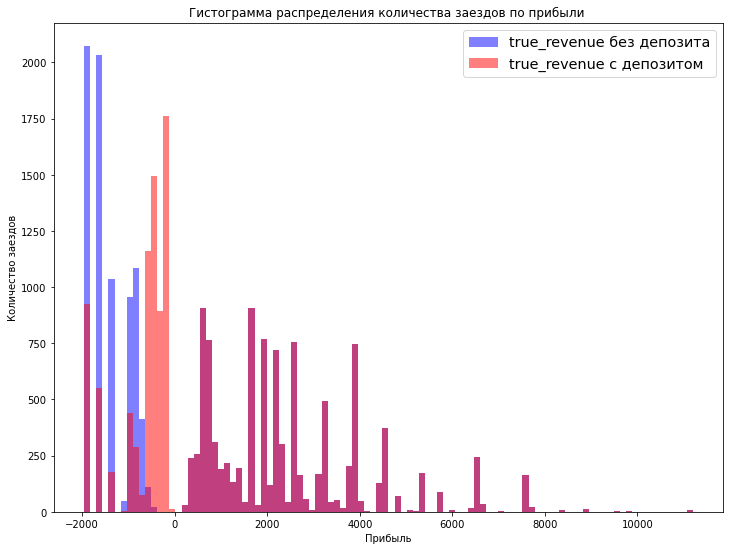

In [200]:



plt.figure(figsize=[12,9])

plt.hist(test['true_revenue'],bins=100,color =('blue'), label = 'true_revenue без депозита', alpha=.5)

plt.hist(test['true_revenue_depo'], bins=100,color =('red'), label = 'true_revenue с депозитом', alpha=.5)

plt.xlabel("Прибыль")

plt.ylabel("Количество заездов")

plt.legend(loc='best', fontsize='x-large')

plt.title("Гистограмма распределения количества заездов по прибыли ")

plt.show()


In [214]:
def visio(df):
    plt.figure(figsize=[12,9])
    plt.hist(df['lead_time'][df['forecast_mode']==1], bins=100,color =('red'), 
             label = 'lead_time is_canceled', alpha=.5)
    
    plt.xlabel("Количество дней между датой бронирования и датой прибытия")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества дней между датой бронирования и датой прибытия")
    plt.show()
    
       
    
    
    plt.figure(figsize=[12,9])
    plt.hist(df['arrival_date_day_of_month'][df['forecast_mode']==1], 
    bins=100,color =('red'), label = 'arrival_date_day_of_month is_canceled', alpha=.5)
    
    plt.xlabel("День в месяце")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по дням месяца")
    plt.show()
    
    plt.figure(figsize=[12,9])
    plt.hist(df['babies'][df['forecast_mode']==1], 
             bins=100,color =('red'), label = 'babies is_canceled', alpha=.5)
    plt.xlabel("babies")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по наличию младенцев")
    plt.show()
    
    plt.figure(figsize=[12,9])
    plt.hist(df['booking_changes'][df['forecast_mode']==1], 
             bins=100,color =('red'), label = 'booking_changes is_canceled', alpha=.5)
    
    plt.xlabel("booking_changes")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по количеству изменений параметров заказа")
    plt.show()
    
    plt.figure(figsize=[12,9])
    plt.hist(df['children'][df['forecast_mode']==1], 
             bins=100,color =('red'), label = 'children is_canceled', alpha=.5)
    
    plt.xlabel("children")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по наличию детей 3-14 лет")
    plt.show()
    
        
    
    plt.figure(figsize=[12,9])
    plt.hist(df['days_in_waiting_list'][df['forecast_mode']==1], 
             bins=100,color =('red'), label = 'days_in_waiting_list is_canceled', alpha=.5)
    
    plt.xlabel("Дней ожидания")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по дням ожидания подтверждения")
    plt.show()
    
       
        
    
    plt.figure(figsize=[12,9])
    plt.hist(df['is_repeated_guest'][df['forecast_mode']==1], 
             bins=100,color =('red'), label = 'is_repeated_guest is_canceled', alpha=.5)
    
    plt.xlabel("Признак повторного бронирования")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по признаку повторного бронирования")
    plt.show()
    
    
    plt.figure(figsize=[12,9])
    plt.hist(df['lead_time'][df['forecast_mode']==1], 
             bins=100,color =('red'), label = 'lead_time is_canceled', alpha=.5)
    
    plt.xlabel("Количество дней между датой бронирования и датой прибытия")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по числу дней между датой бронирования и датой прибытия")
    plt.show()
    
    
    
    
    
    
    plt.figure(figsize=[12,9])
    plt.hist(df['previous_bookings_not_canceled'][df['forecast_mode']==1], 
             bins=100,color =('red'), label = 'previous_bookings_not_canceled is_canceled', alpha=.5)
    
    plt.xlabel("Количество подтверждённых заказов у клиента")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов количеству подтверждённых заказов у клиента")
    plt.show()
    
    
    plt.figure(figsize=[12,9])
    plt.hist(df['previous_cancellations'][df['forecast_mode']==1], 
             bins=100,color =('red'), label = 'previous_cancellations is_canceled', alpha=.5)
    
    plt.xlabel("Количество отменённых заказов у клиента")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по количеству отменённых заказов у клиента")
    plt.show()
    
    
    plt.figure(figsize=[12,9])
    plt.hist(df['required_car_parking_spaces'][df['forecast_mode']==1], 
             bins=100,color =('red'), label = 'required_car_parking_spaces is_canceled', alpha=.5)
    
    plt.xlabel("Необходимость места для автомобиля")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по необходимости места для автомобиля")
    plt.show()
    
    
    
    
      
    
    
    
    
    plt.figure(figsize=[12,9])
    plt.hist(df['total_nights'][df['forecast_mode']==1], 
             bins=100,color =('red'), label = 'total_nights is_canceled', alpha=.5)
    
    plt.xlabel("Общее количество ночей")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по общему количество ночей")
    plt.show()
    
    
    
    
    plt.figure(figsize=[12,9])
    plt.hist(df['total_of_special_requests'][df['forecast_mode']==1], 
             bins=100,color =('red'), label = 'total_of_special_requests is_canceled', alpha=.5)
    
    plt.xlabel("Количество специальных отметок")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения количества заездов по количеству специальных отметок")
    plt.show()
    
    plt.figure(figsize=[12,9])
    plt.hist(df['price_class'][df['forecast_mode']==1], 
             bins=100,color =('red'), label = 'price_class', alpha=.5)
    
    plt.xlabel("Ценовой класс номера")
    plt.ylabel("Количество заездов")
    plt.legend(loc='best', fontsize='x-large')
    plt.title("Гистограмма распределения  заездов по ценовому классу номера")
    plt.show()
    
    
    
    
    
    
    
    

     

#### Портрет «ненадёжного» клиента

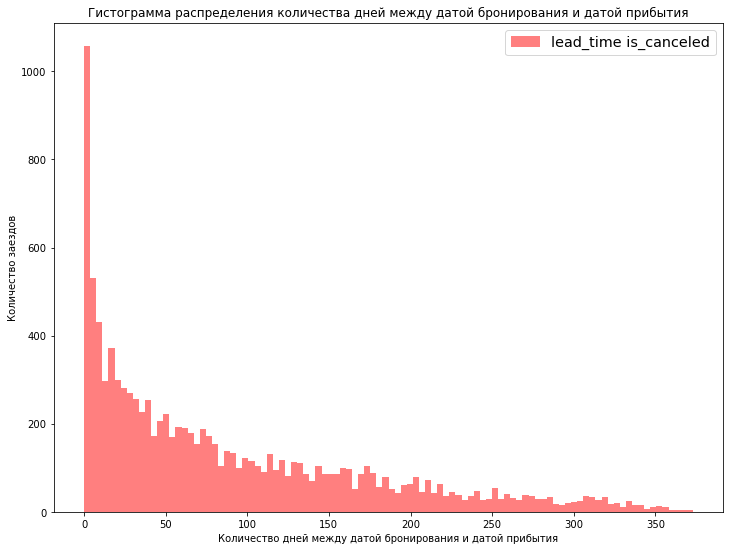

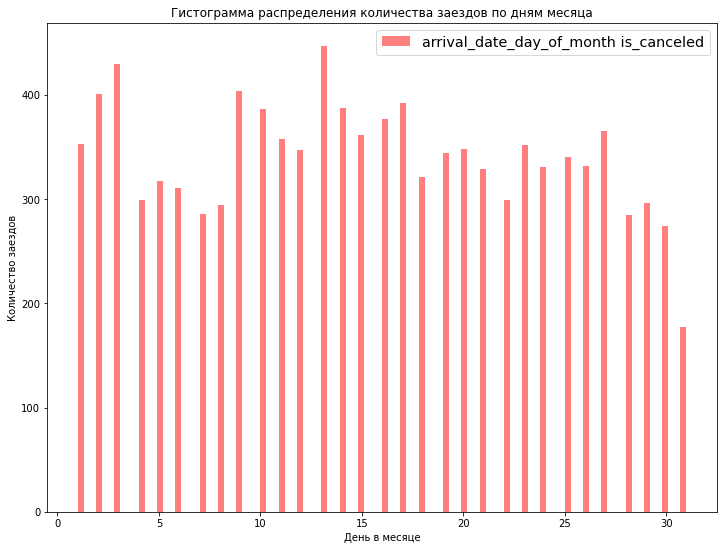

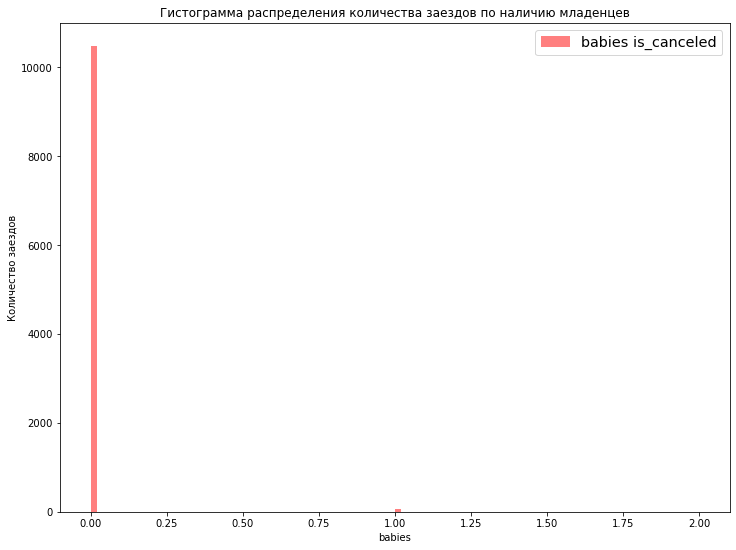

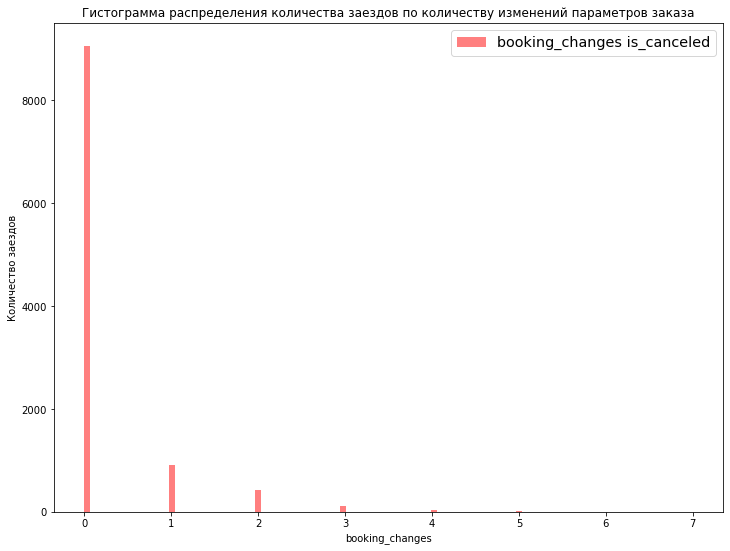

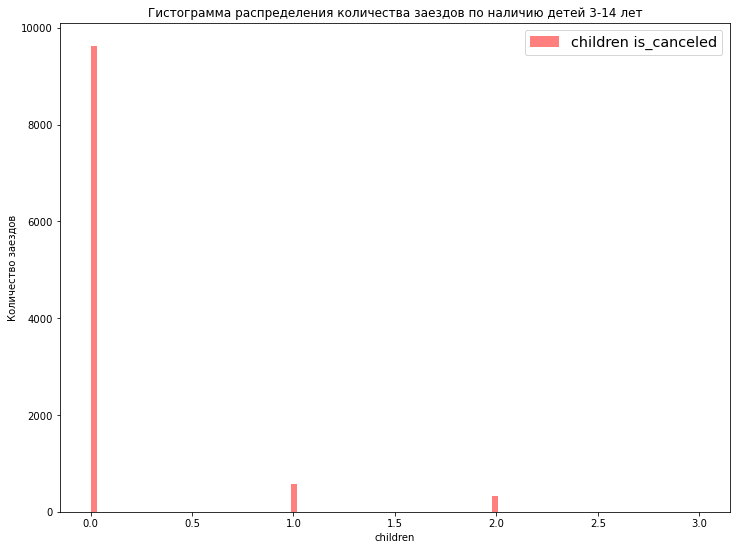

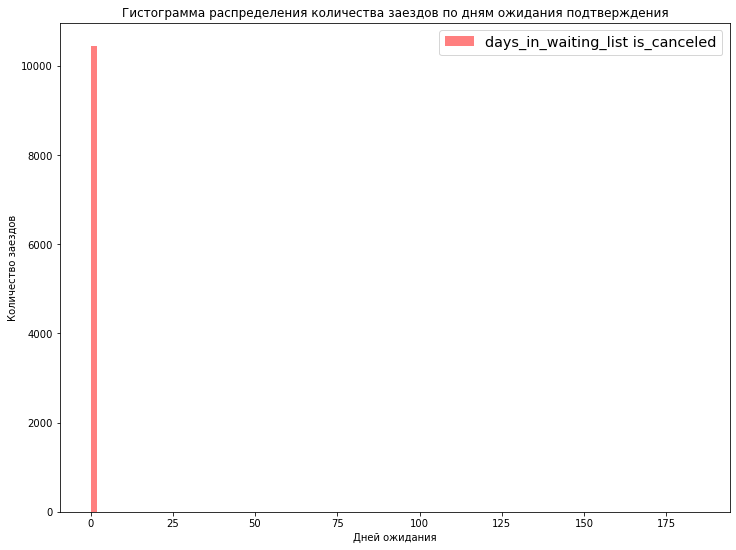

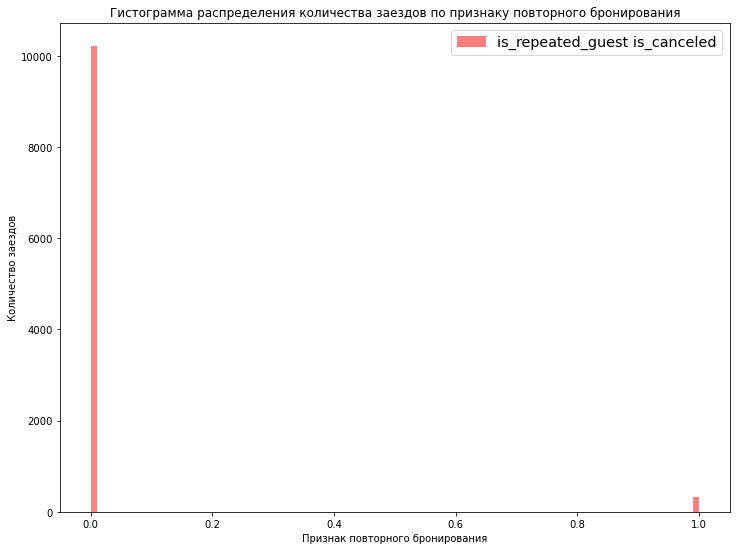

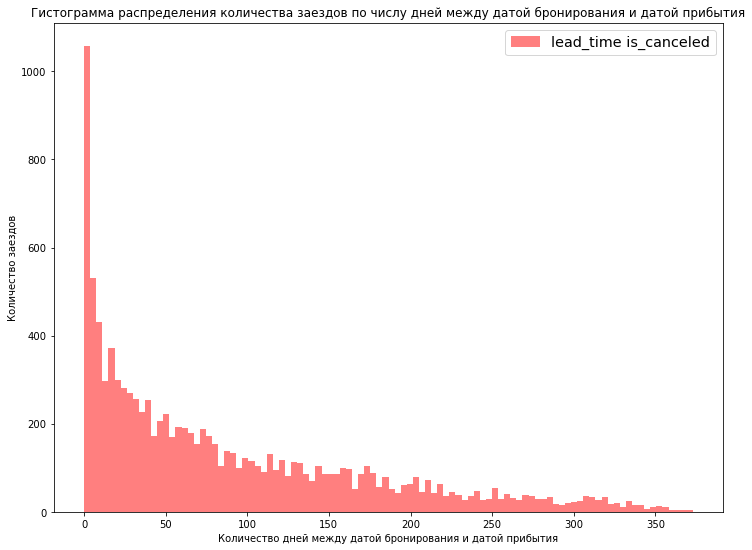

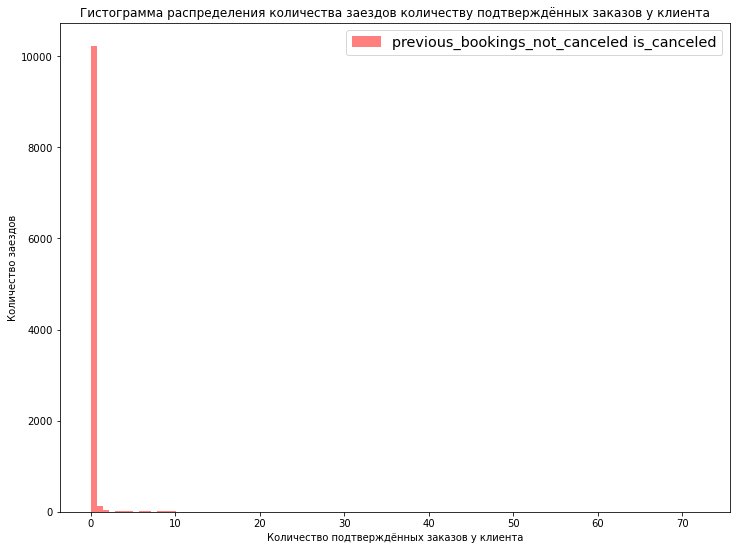

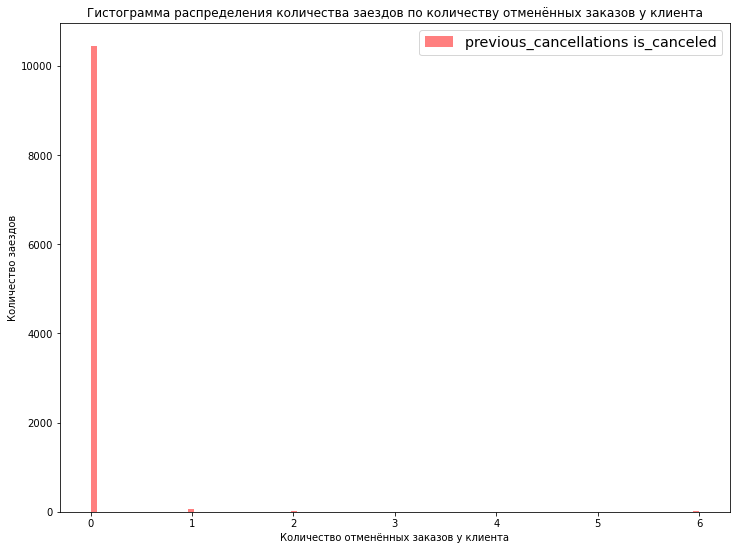

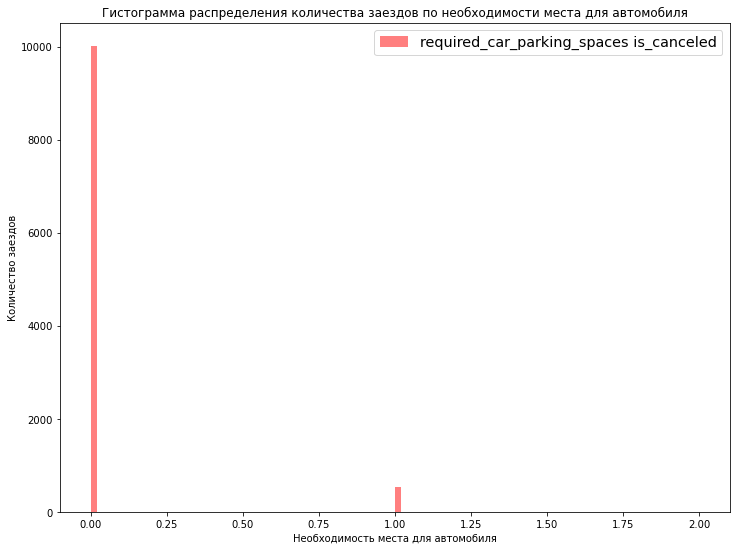

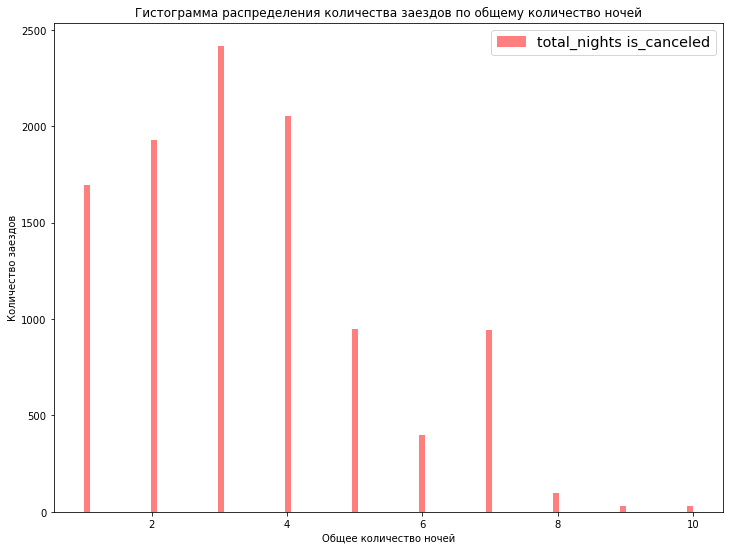

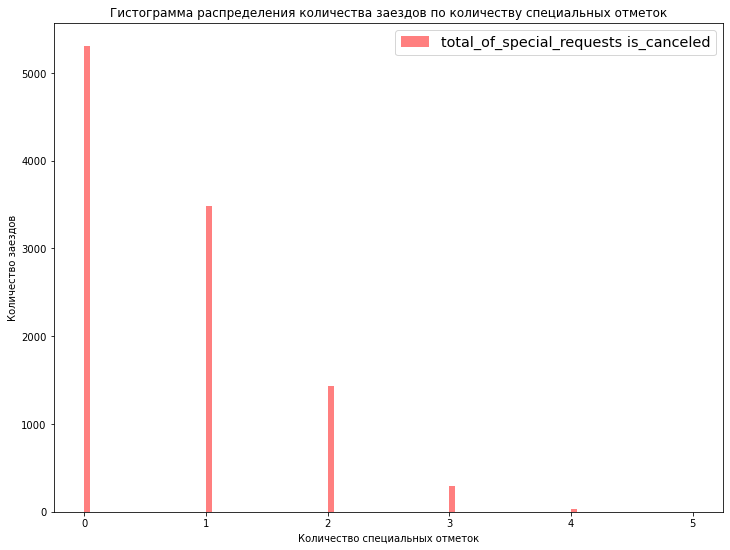

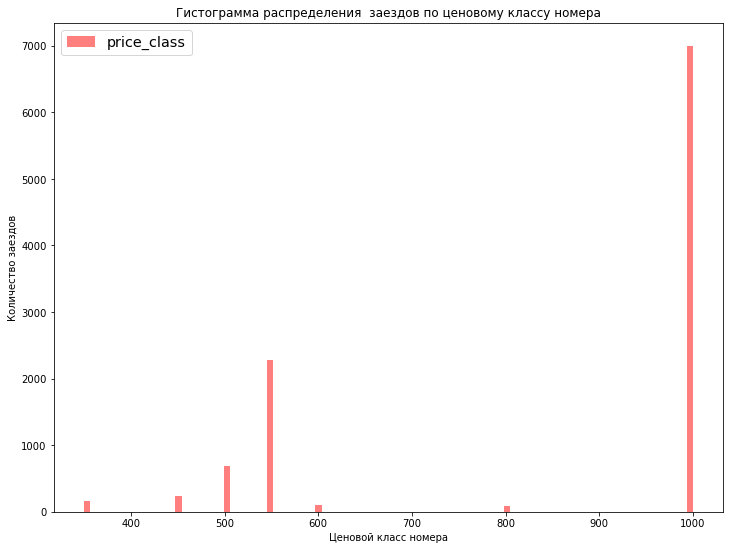

In [215]:
visio(test)

Количество дней между датой бронирования и датой заезда от 0 до 50, заезжает преимущественно на 1 ночь чаще всего в будний день, нет специальных отметок, имел отмененные заказы в диапазоне от 0 до 6 или более 11 отмен заказа, имеет от 0 до 20 подтвержденных заказов, в основном не требуется парковочное место, бронирует повторно, ожидал подтверждения 0, дней, не имеет детей 3-14 лет,в основном менял параметры заказов от 0 до 4 раз, также в основном бронирует на 1 - 10 неделе и с 20 по 30 неделю и в основном останавливается в номере класса 1000, то есть категории A

# Итоговый вывод:

В данном исследовании была проведена обширная предобработка данных, включая устранение аномалий и коррекцию некорректных форматов данных. Была также рассчитана прибыль за 2017 и 2016 года, что позволило выяснить интересные тенденции. Основным результатом этого анализа стало обнаружение того, что прибыль отеля растет, но при этом имеется потенциальный убыток, составляющий около 60% от медианной стоимости аренды номера. Это является существенной проблемой, которую следует учитывать при разработке стратегии отеля.

Для решения задачи классификации были обучены несколько моделей машинного обучения, такие как RandomForest, DecisionTree и LogisticRegression. Лучшие результаты были достигнуты с использованием модели RandomForest с определенными гиперпараметрами, что позволило добиться F1-меры в размере 0.3028. Эти результаты позволили выбрать RandomForest как лучшую модель для решения задачи классификации.

Итоговая стратегия, предложенная на основе результатов анализа и моделирования, включает в себя комбинированную систему, которая включает в себя введение депозита для клиентов и использование прогнозных моделей для определения вероятности отмены бронирования. Это предложение может помочь увеличить среднюю прибыль отеля на 313 рублей.

Однако остается вопрос, зачем отелю уходить в убытки, и важно рассмотреть дополнительные стратегии и действия, направленные на уменьшение потенциальных убытков и оптимизацию прибыли. Это может включать в себя пересмотр ценовой политики, маркетинговые мероприятия и улучшение обслуживания, чтобы увеличить долю успешных бронирований и уменьшить риск убытков.